In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
import sys
import PIL
import scipy.stats as stats
sys.path.insert(0, '/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/')

In [29]:
path = r'/Users/lfsmbn/orkun/projects/ongoing/GBMF_motility/Results_FINAL_FINAL_agar_analysis_summary/'
base = '0_all_data_summary'
base2 = '0_all_data_dwell_data_130fil4_130fil8_131fil7_130Fil9_84filC_1stEntryRemoved'
#base2 = '0_all_data_dwell_data'
saveFileHist = base2+r'_dwelltime.png'
saveFileHist2 = base2+r'_dwelltime_headTail.png'
saveFileLvsSpeed3 = base+r'_L_vs_speed_MaxMeanMedian.png'
saveFileLvsSpeed4 = base+r'_track_vs_speed_MaxMeanMedian.png'
saveFileLvsSpeed = base+r'_L_vs_speed_Median.png'
saveFileLvsDwell = base+r'_L_vs_dwellTime_Median.png'
saveFileLvsNreversal = base+r'_L_or_T_vs_nReversal.png'

df = pd.read_csv(path+base+".csv",sep="\t")
df1 = pd.read_csv(path+base2+".csv",sep="\t",dtype={0:'string',1:'float',2:'float',3:'float'})

df_values = df.iloc[:, 1:]
df_ids = df.iloc[:, 1]
summaryStats = df_values.to_numpy()
summaryStats[:,1]

df1_values = df1.iloc[:, 1:]
df1_ids = df1.iloc[:, 0]
stopDurations = df1_values.to_numpy()
stopDurations[:,0]

#len(stopDurations[:,0])
len(summaryStats[:,1])

65

In [171]:
df1.iloc[0,:], len(stopDurations[:,1])

(fileName           FCCPset_03_08_22_Optoscope_x10_10sec_CellCam_T...
 dwellTimeCentre                                                 10.0
 dwellTimeTail                                                   70.0
 dwellTimeHead                                                   10.0
 Name: 0, dtype: object,
 1998)

In [172]:
df.iloc[0,:], len(summaryStats[:,1])



(Unnamed: 0                                                                    0
 FilamentID                    FCCPset_03_08_22_Optoscope_x10_10sec_CellCam_T...
 label                                                                         0
 filLength[um]                                                         80.157115
 trackLength[um]                                                      324.066056
 expectedReversals                                                           5.0
 nReversals                                                                    7
 maxSpeed[um_sec]                                                        1.72016
 meanSpeed[um_sec]                                                      0.682774
 medianSpeed[um_sec]                                                    0.638258
 meanDwellTime[sec]                                                     3.571429
 meanDwellTime_endA[sec]                                                     2.2
 meanDwellTime_endB[sec]    

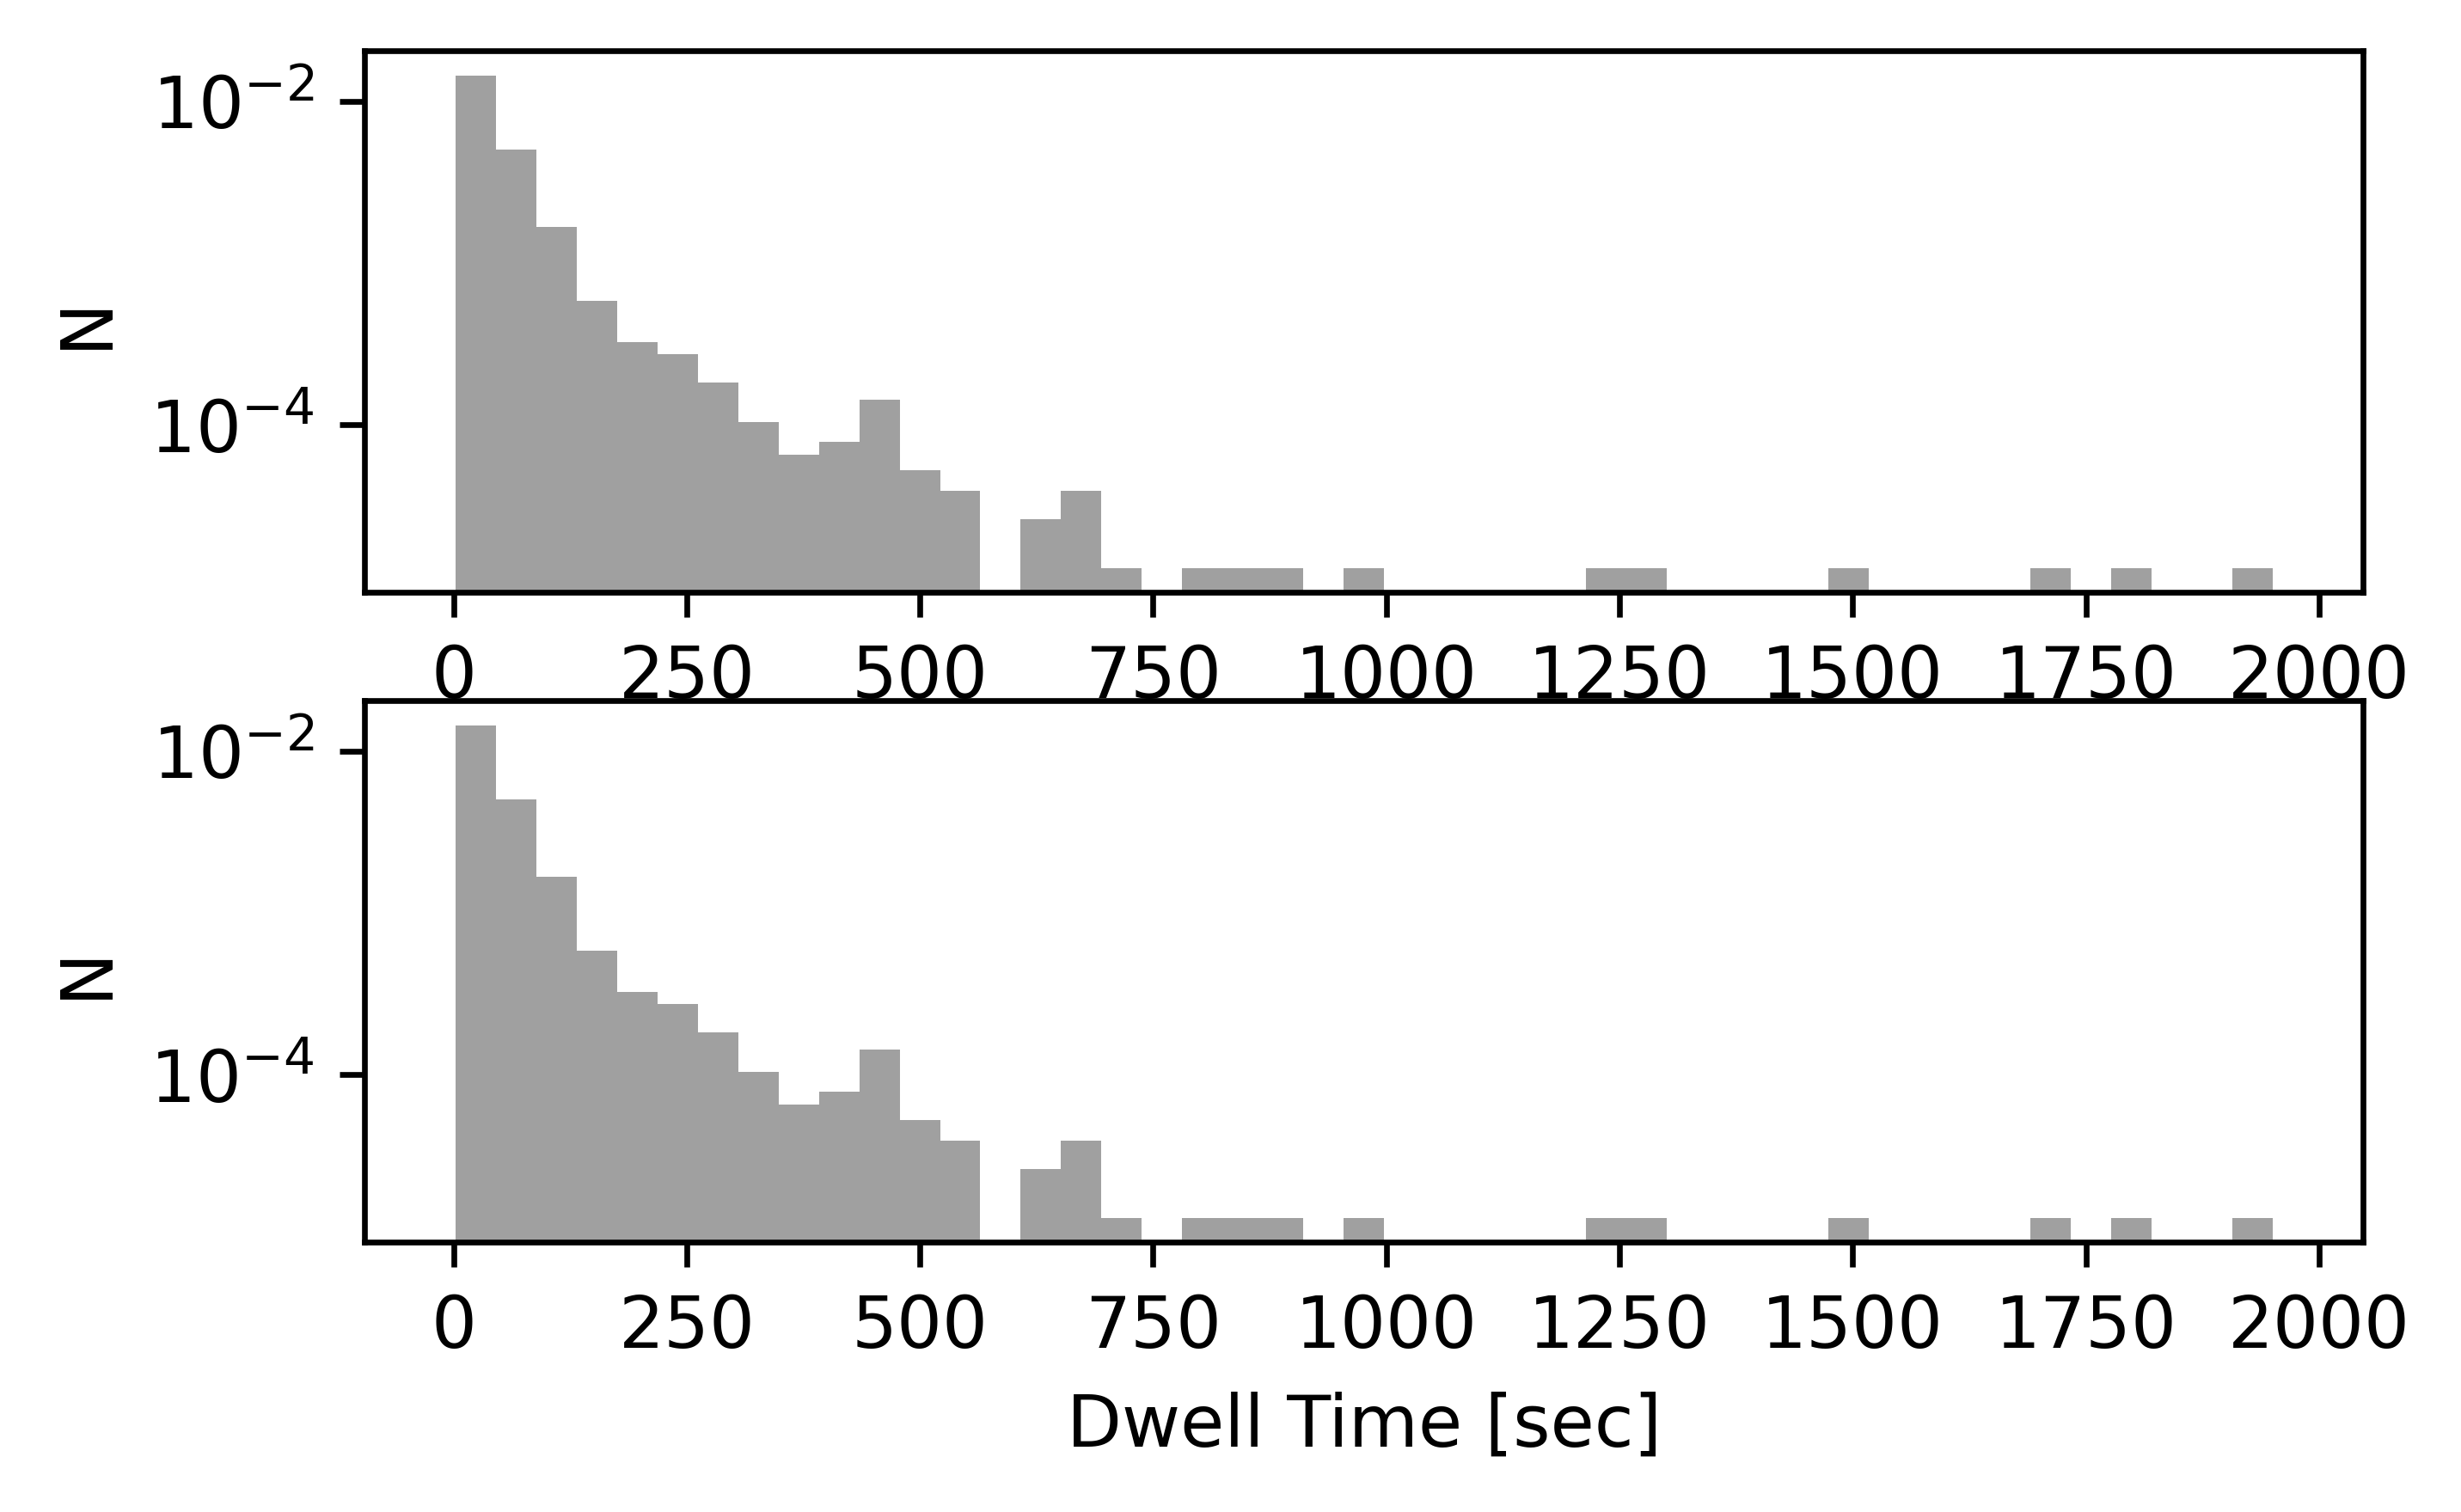

In [48]:
#plot
centre_DT = np.copy(stopDurations[:,0])
centre_DT = centre_DT[~np.isnan(centre_DT)]

fig, ax = plt.subplots(2,1, figsize=(5,3), dpi=600)
ax[0].hist(stopDurations[:,0],bins=45, density=True, alpha=0.75, color='gray',log=True)
ax[0].set_ylabel('N')
ax[0].set_xlabel('Dwell Time [sec]')

ax[1].hist(centre_DT,bins=45, density=True, alpha=0.75, color='gray',log=True)
ax[1].set_ylabel('N')
ax[1].set_xlabel('Dwell Time [sec]')
fig.savefig(saveFileHist)
#plt.xscale('log')
plt.show()
plt.close(fig)

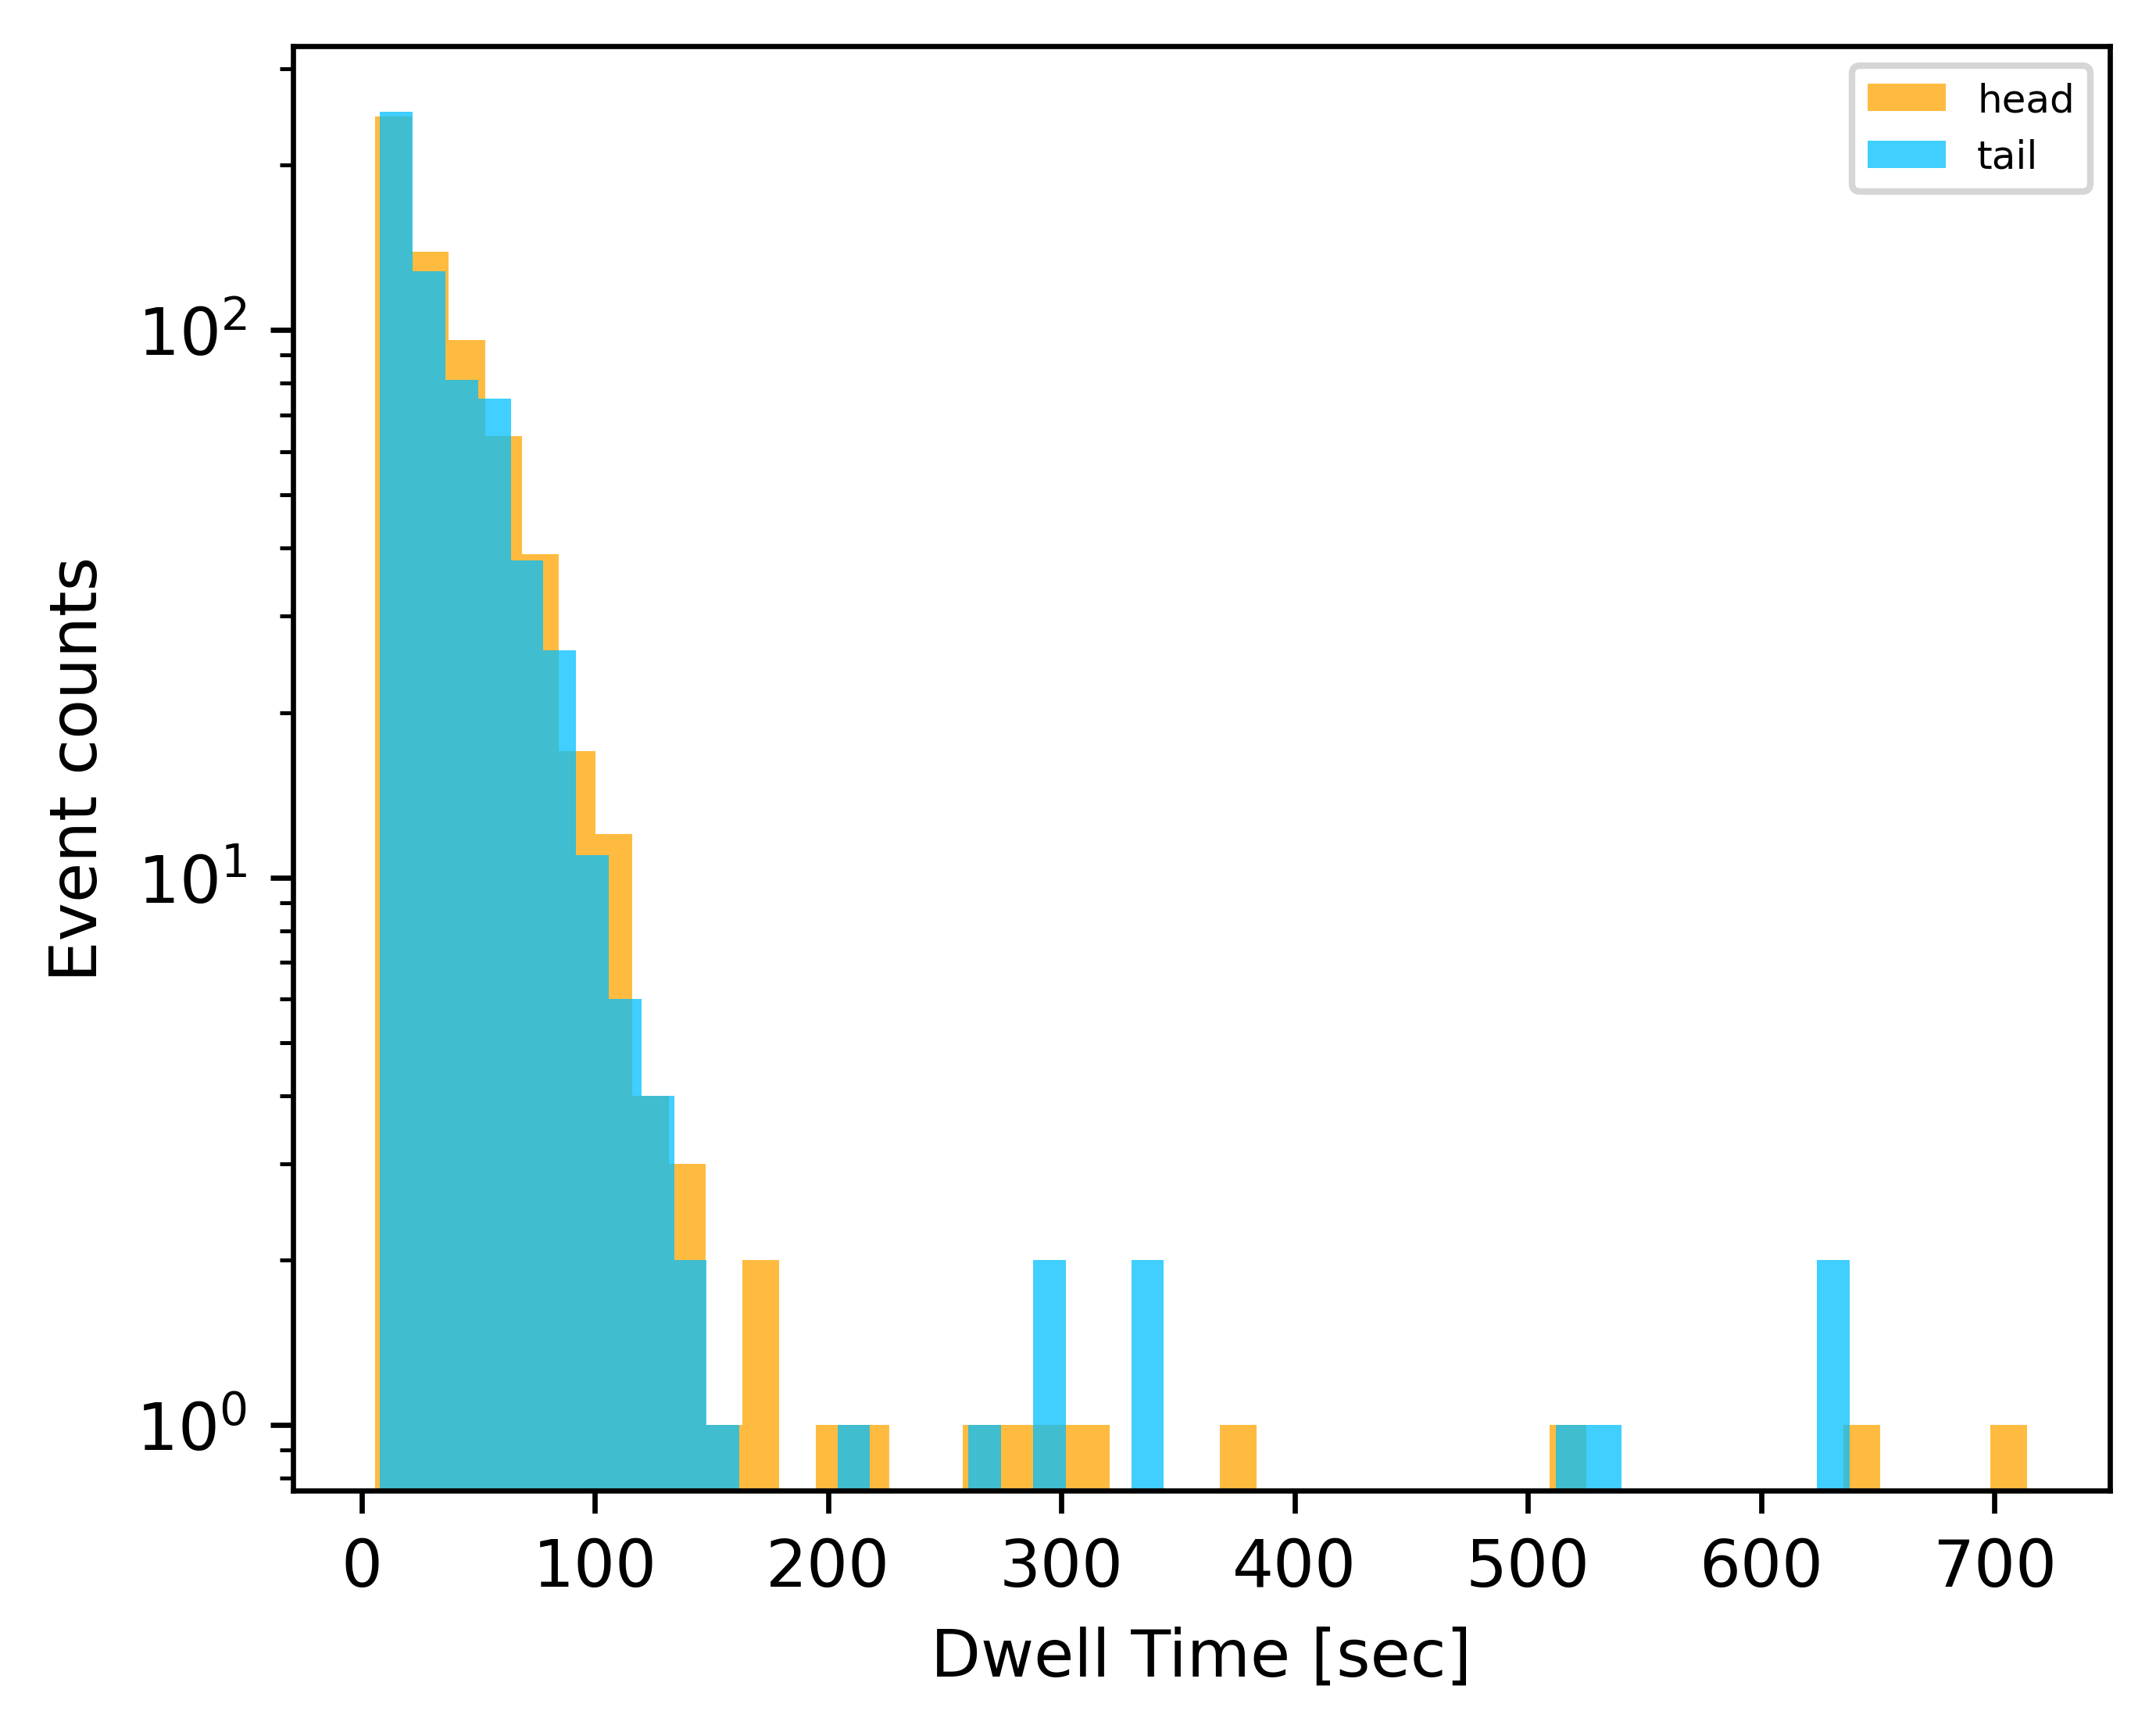

(632, 632, 1776, 1998, 1998)

In [54]:
#remove entries where end-based dwell time differs by more than 30% from centre-based dwell time as artefacts of image segmentation
centre_DT = np.copy(stopDurations[:,0])
head_DT = np.copy(stopDurations[:,2])
tail_DT = np.copy(stopDurations[:,1])
MeTol=0.5
for i in range(0,len(stopDurations[:,1])):
    if (np.abs(stopDurations[i,0]-stopDurations[i,1]) > stopDurations[i,0]*MeTol) or np.abs(stopDurations[i,0]-stopDurations[i,2]) > stopDurations[i,0]*MeTol:
        head_DT[i] = np.nan
        tail_DT[i] = np.nan
    if (np.isnan(stopDurations[i,1]) == True) or (np.isnan(stopDurations[i,2]) == True) :
        head_DT[i] = np.nan
        tail_DT[i] = np.nan
head_DT = head_DT[~np.isnan(head_DT)]
tail_DT = tail_DT[~np.isnan(tail_DT)]
centre_DT = centre_DT[~np.isnan(centre_DT)]

#plot stop durations
#fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=600)
#ax.hist(stopDurations[:,2],bins=45, density=False, alpha=0.75, color='orange', label='head',log=True)
#ax.hist(stopDurations[:,1],bins=45, density=False, alpha=0.75, color='deepskyblue',label='tail',log=True)
#ax.set_ylabel('Event counts')
#ax.set_xlabel('Dwell Time [sec]')
#ax.legend(loc="upper right",fontsize=6)

fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=600)
ax.hist(head_DT,bins=45, density=False, alpha=0.75, color='orange', label='head',log=True)
ax.hist(tail_DT,bins=45, density=False, alpha=0.75, color='deepskyblue',label='tail',log=True)
ax.set_ylabel('Event counts')
ax.set_xlabel('Dwell Time [sec]')
ax.legend(loc="upper right",fontsize=6)

fig.savefig(saveFileHist2)
#plt.xscale('log')
plt.show()
plt.close(fig)

len(head_DT),len(tail_DT),len(centre_DT),len(stopDurations[:,1]),len(stopDurations[:,2])

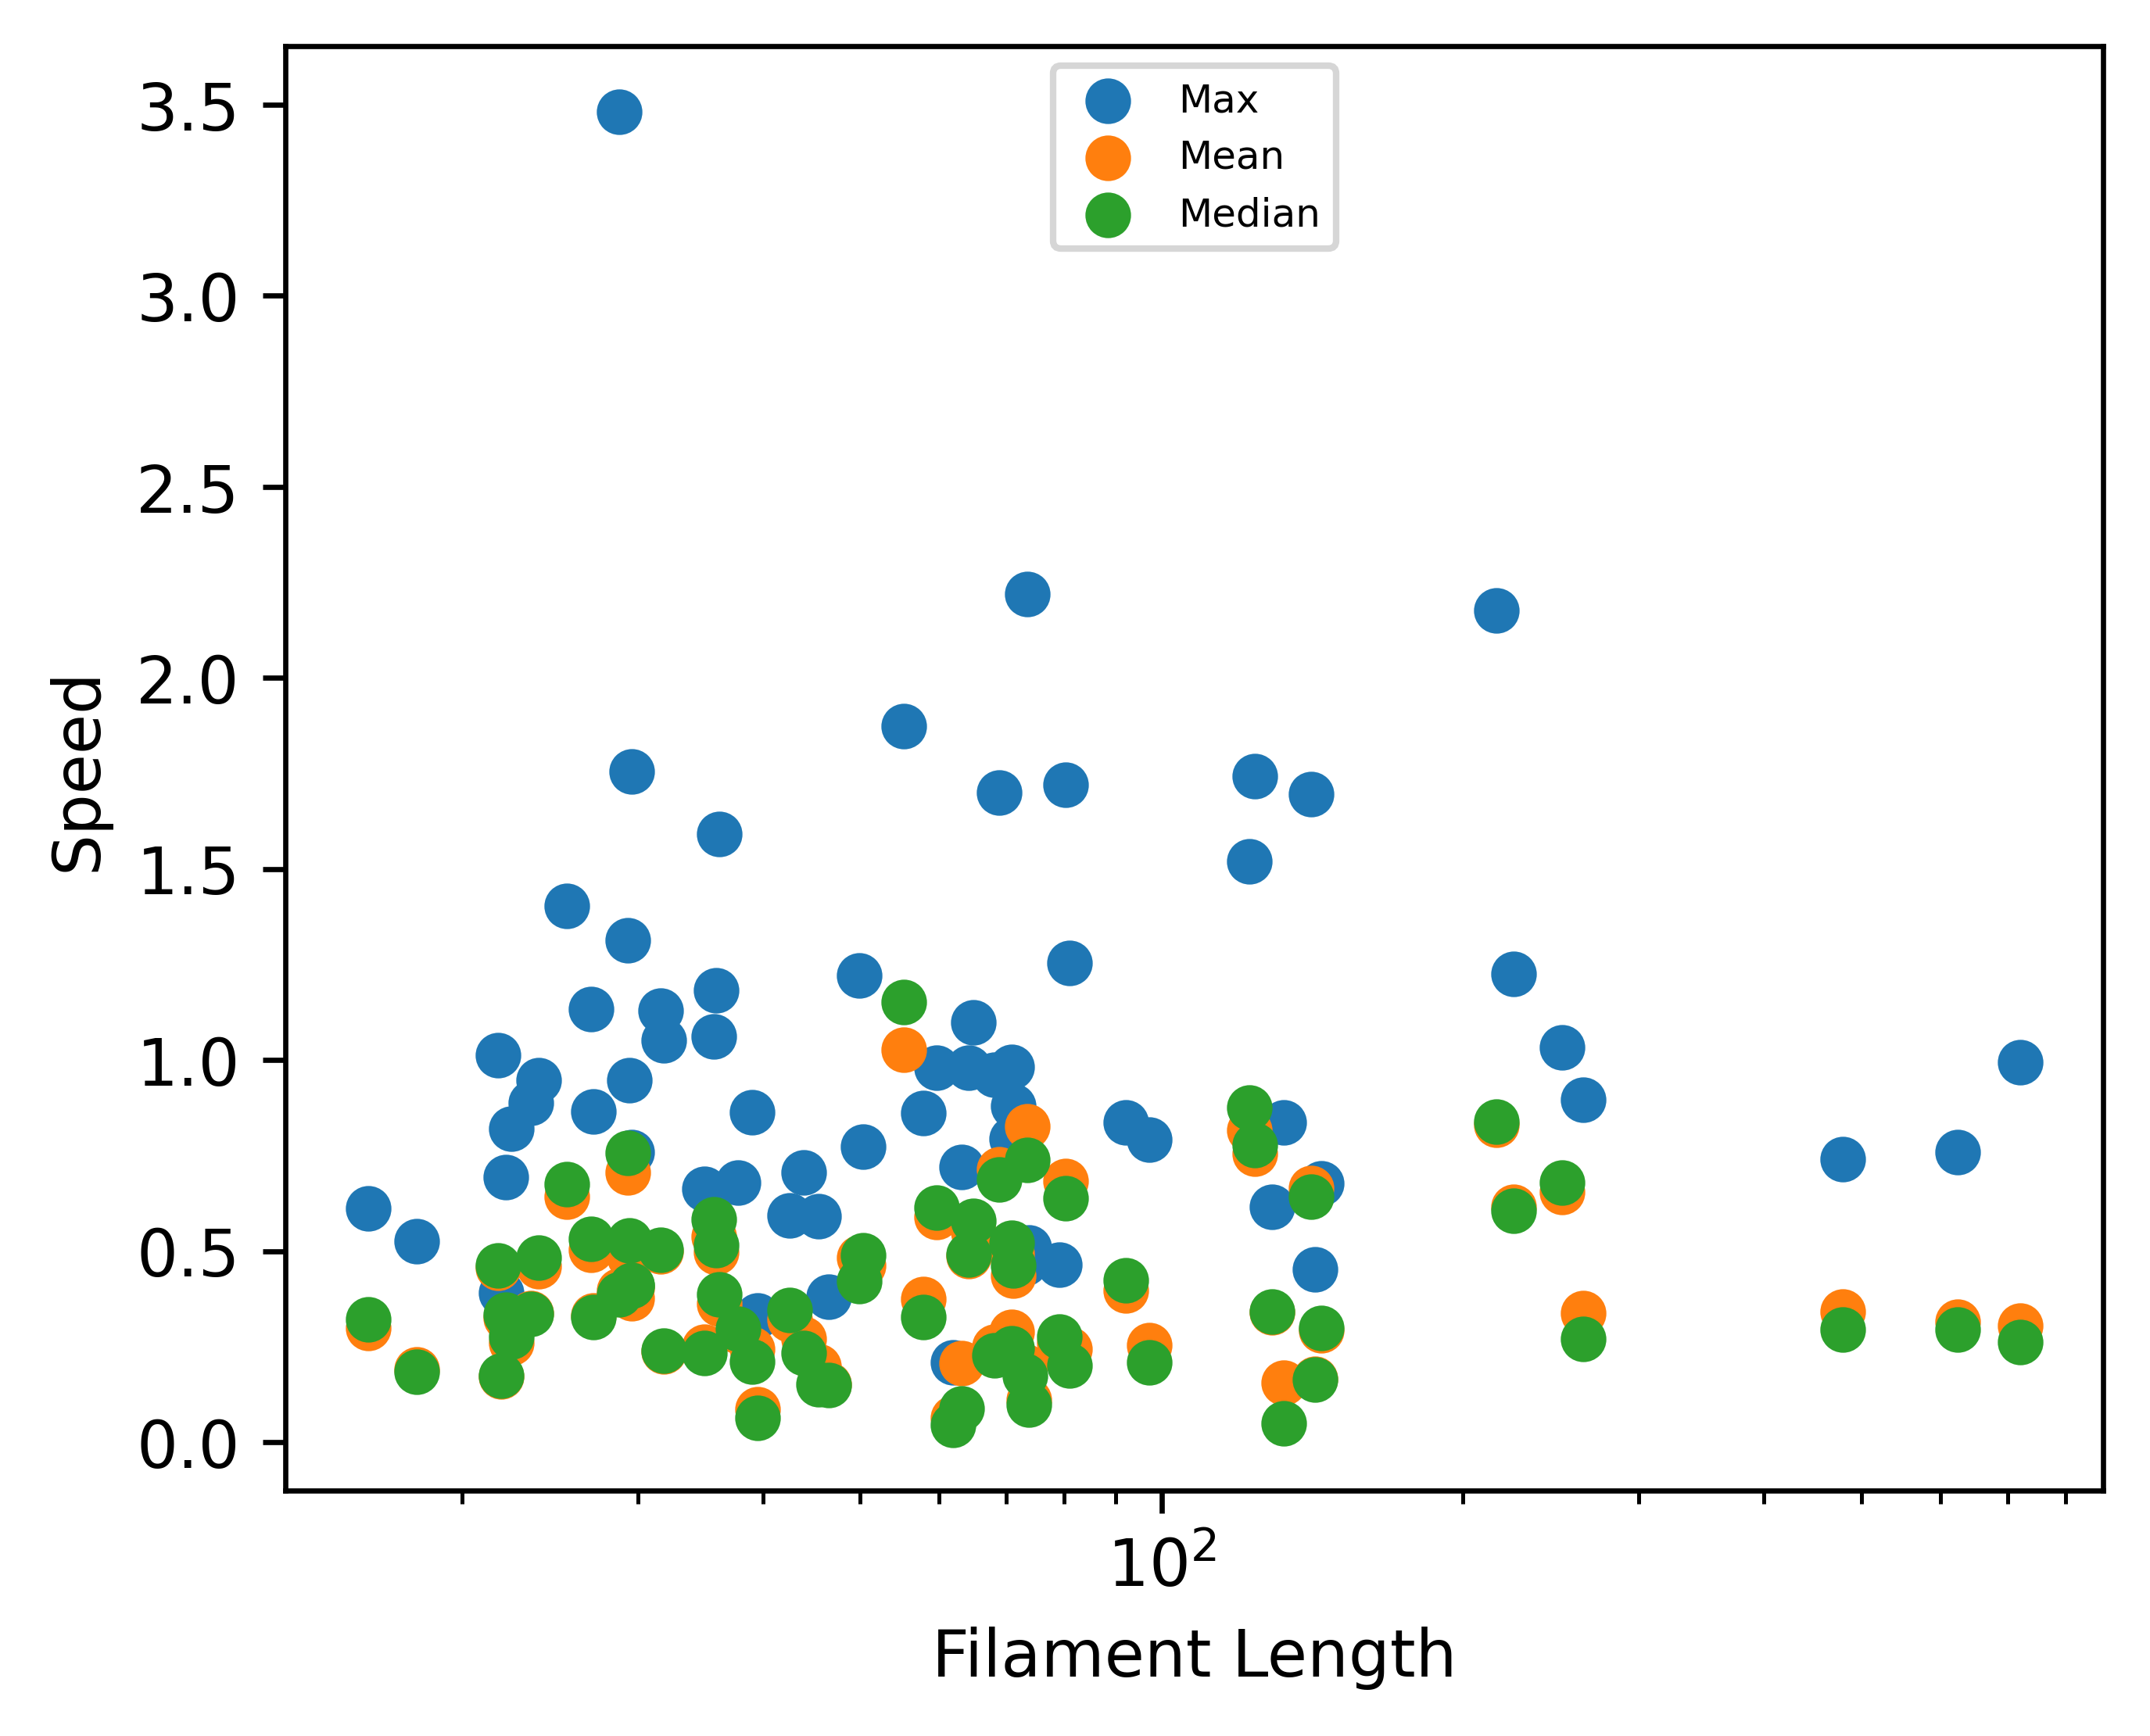

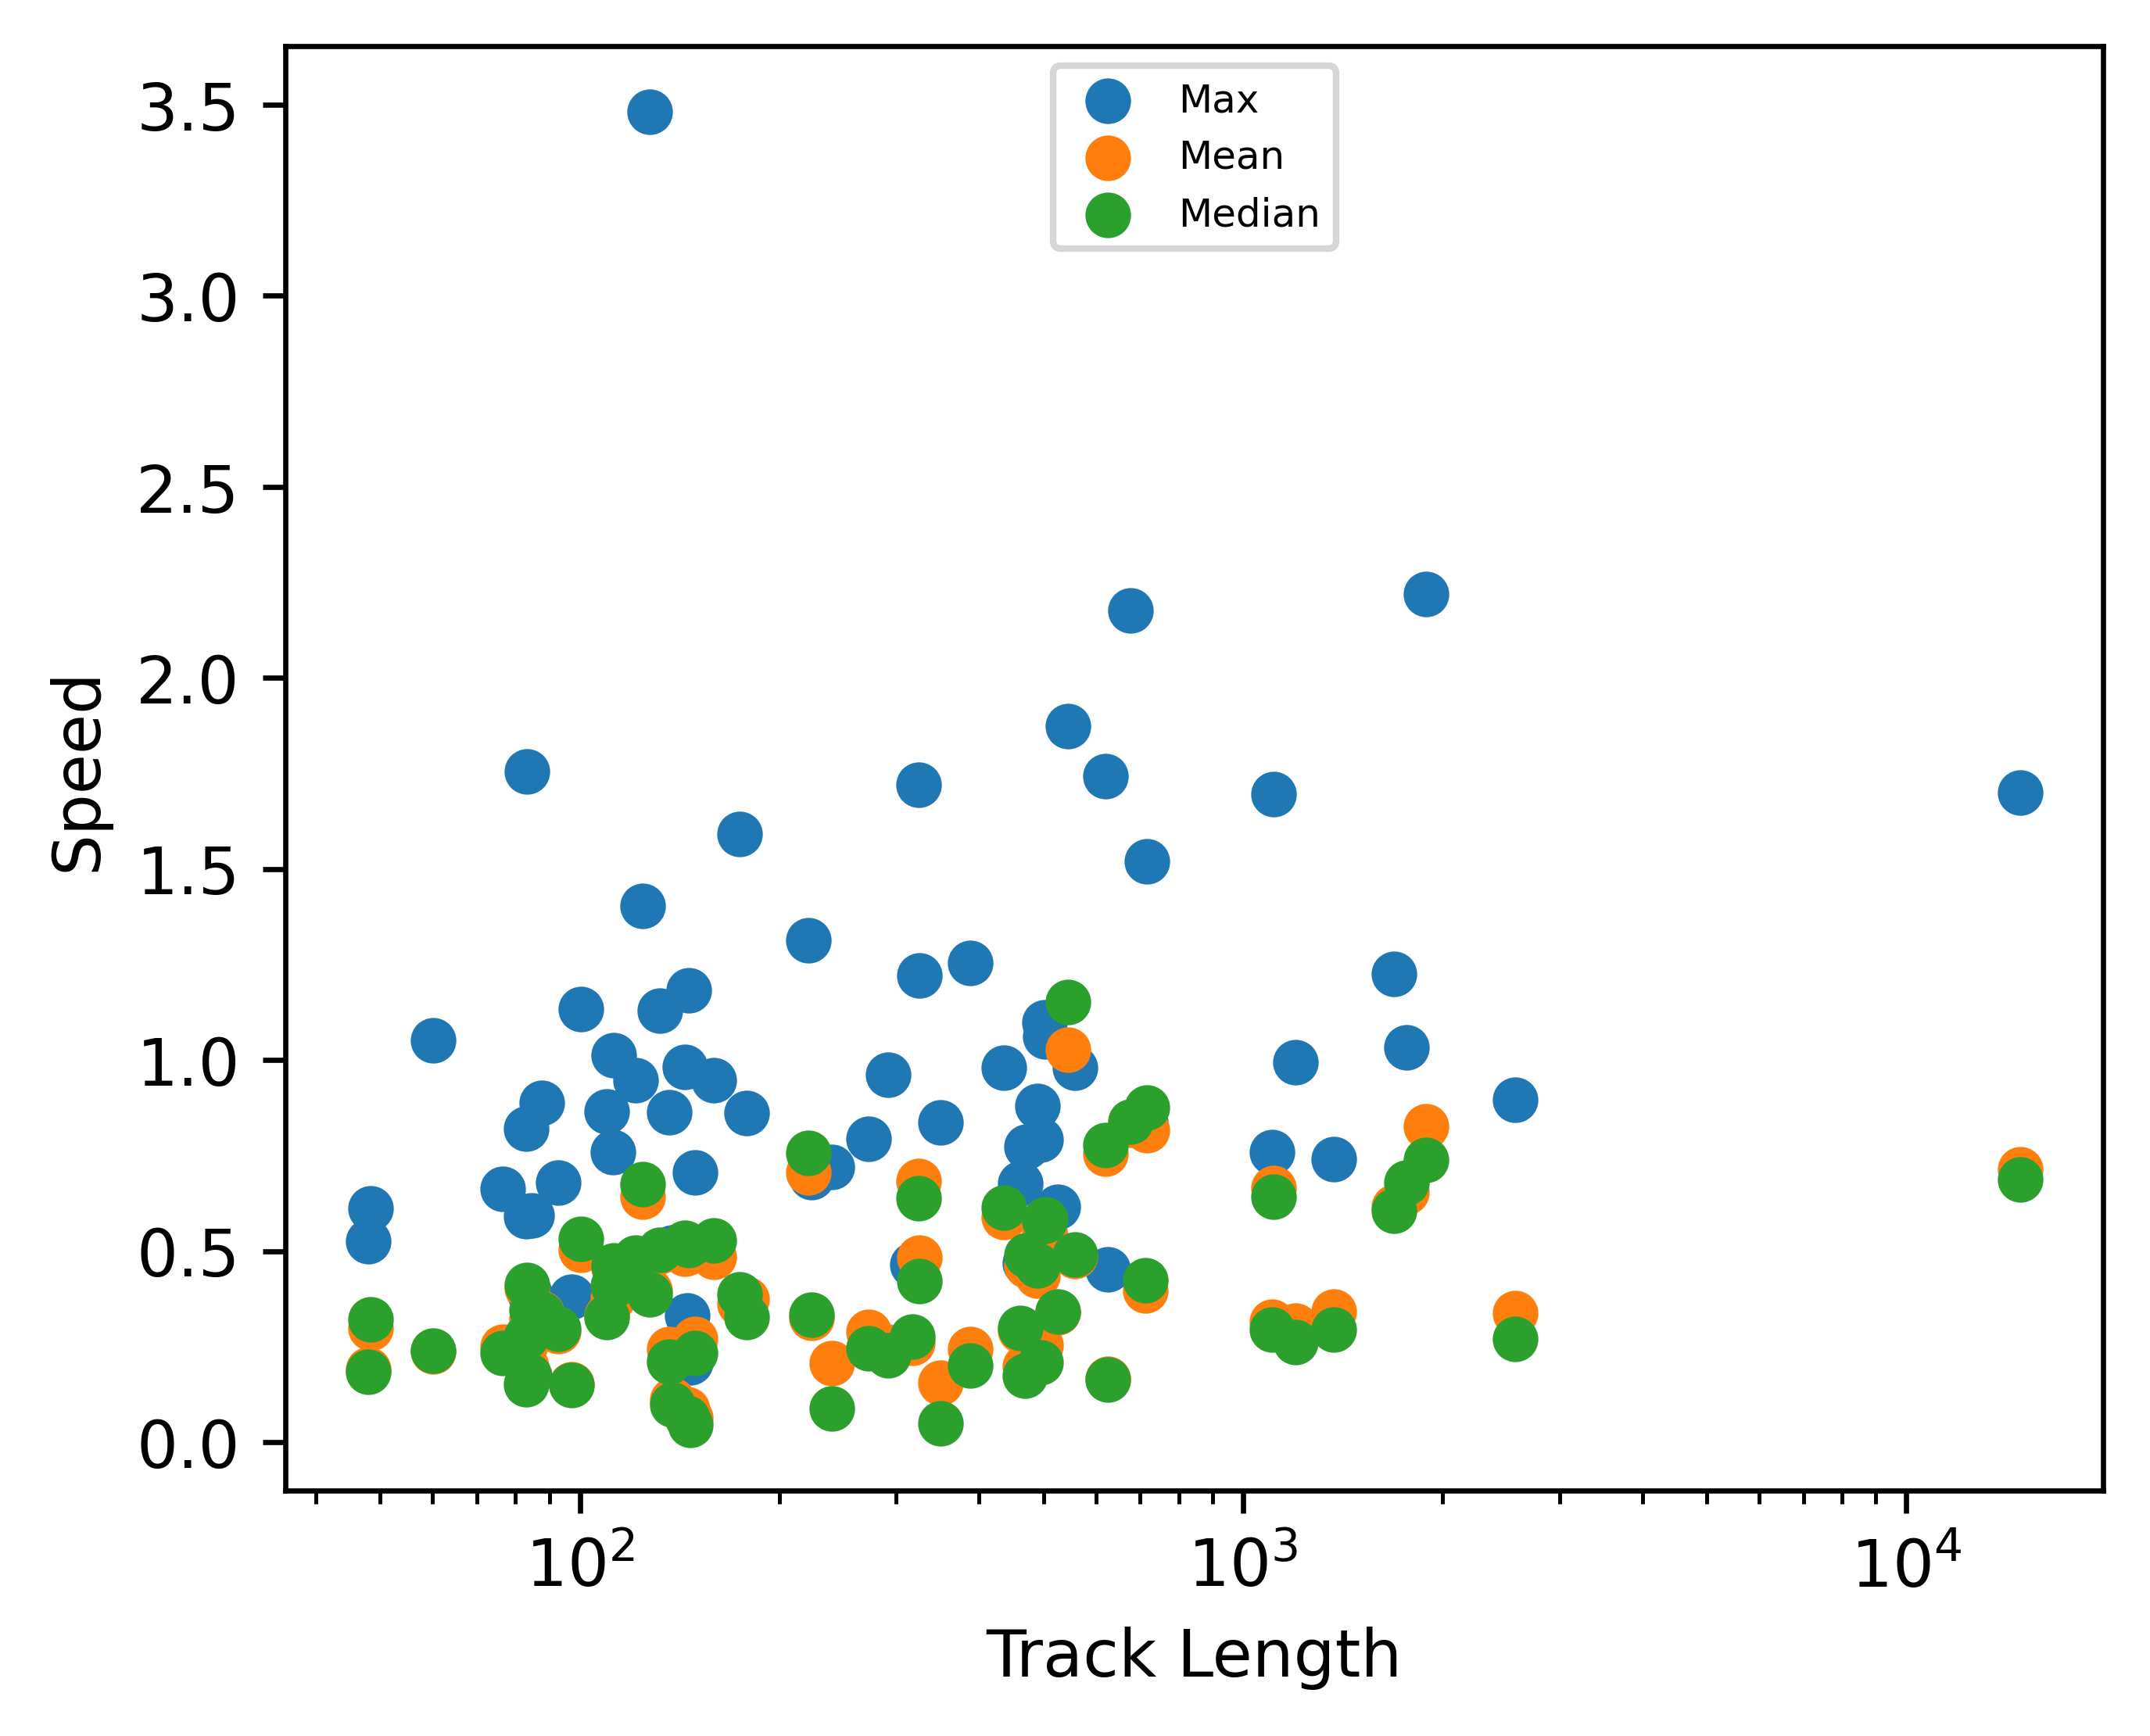

In [177]:

fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=600)
ax.scatter(summaryStats[:,2],summaryStats[:,6], label="Max")
ax.scatter(summaryStats[:,2],summaryStats[:,7],label="Mean")
ax.scatter(summaryStats[:,2],summaryStats[:,8],label="Median")
ax.set_xscale('log')
ax.set_xlabel('Filament Length')
ax.set_ylabel('Speed')
ax.legend(loc="upper center",fontsize=6)
fig.savefig(saveFileLvsSpeed3)
plt.show()
plt.close(fig)


fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=600)
ax.scatter(summaryStats[:,3],summaryStats[:,6], label="Max")
ax.scatter(summaryStats[:,3],summaryStats[:,7],label="Mean")
ax.scatter(summaryStats[:,3],summaryStats[:,8],label="Median")
ax.set_xscale('log')
ax.set_xlabel('Track Length')
ax.set_ylabel('Speed')
ax.legend(loc="upper center",fontsize=6)
fig.savefig(saveFileLvsSpeed4)
plt.show()
plt.close(fig)

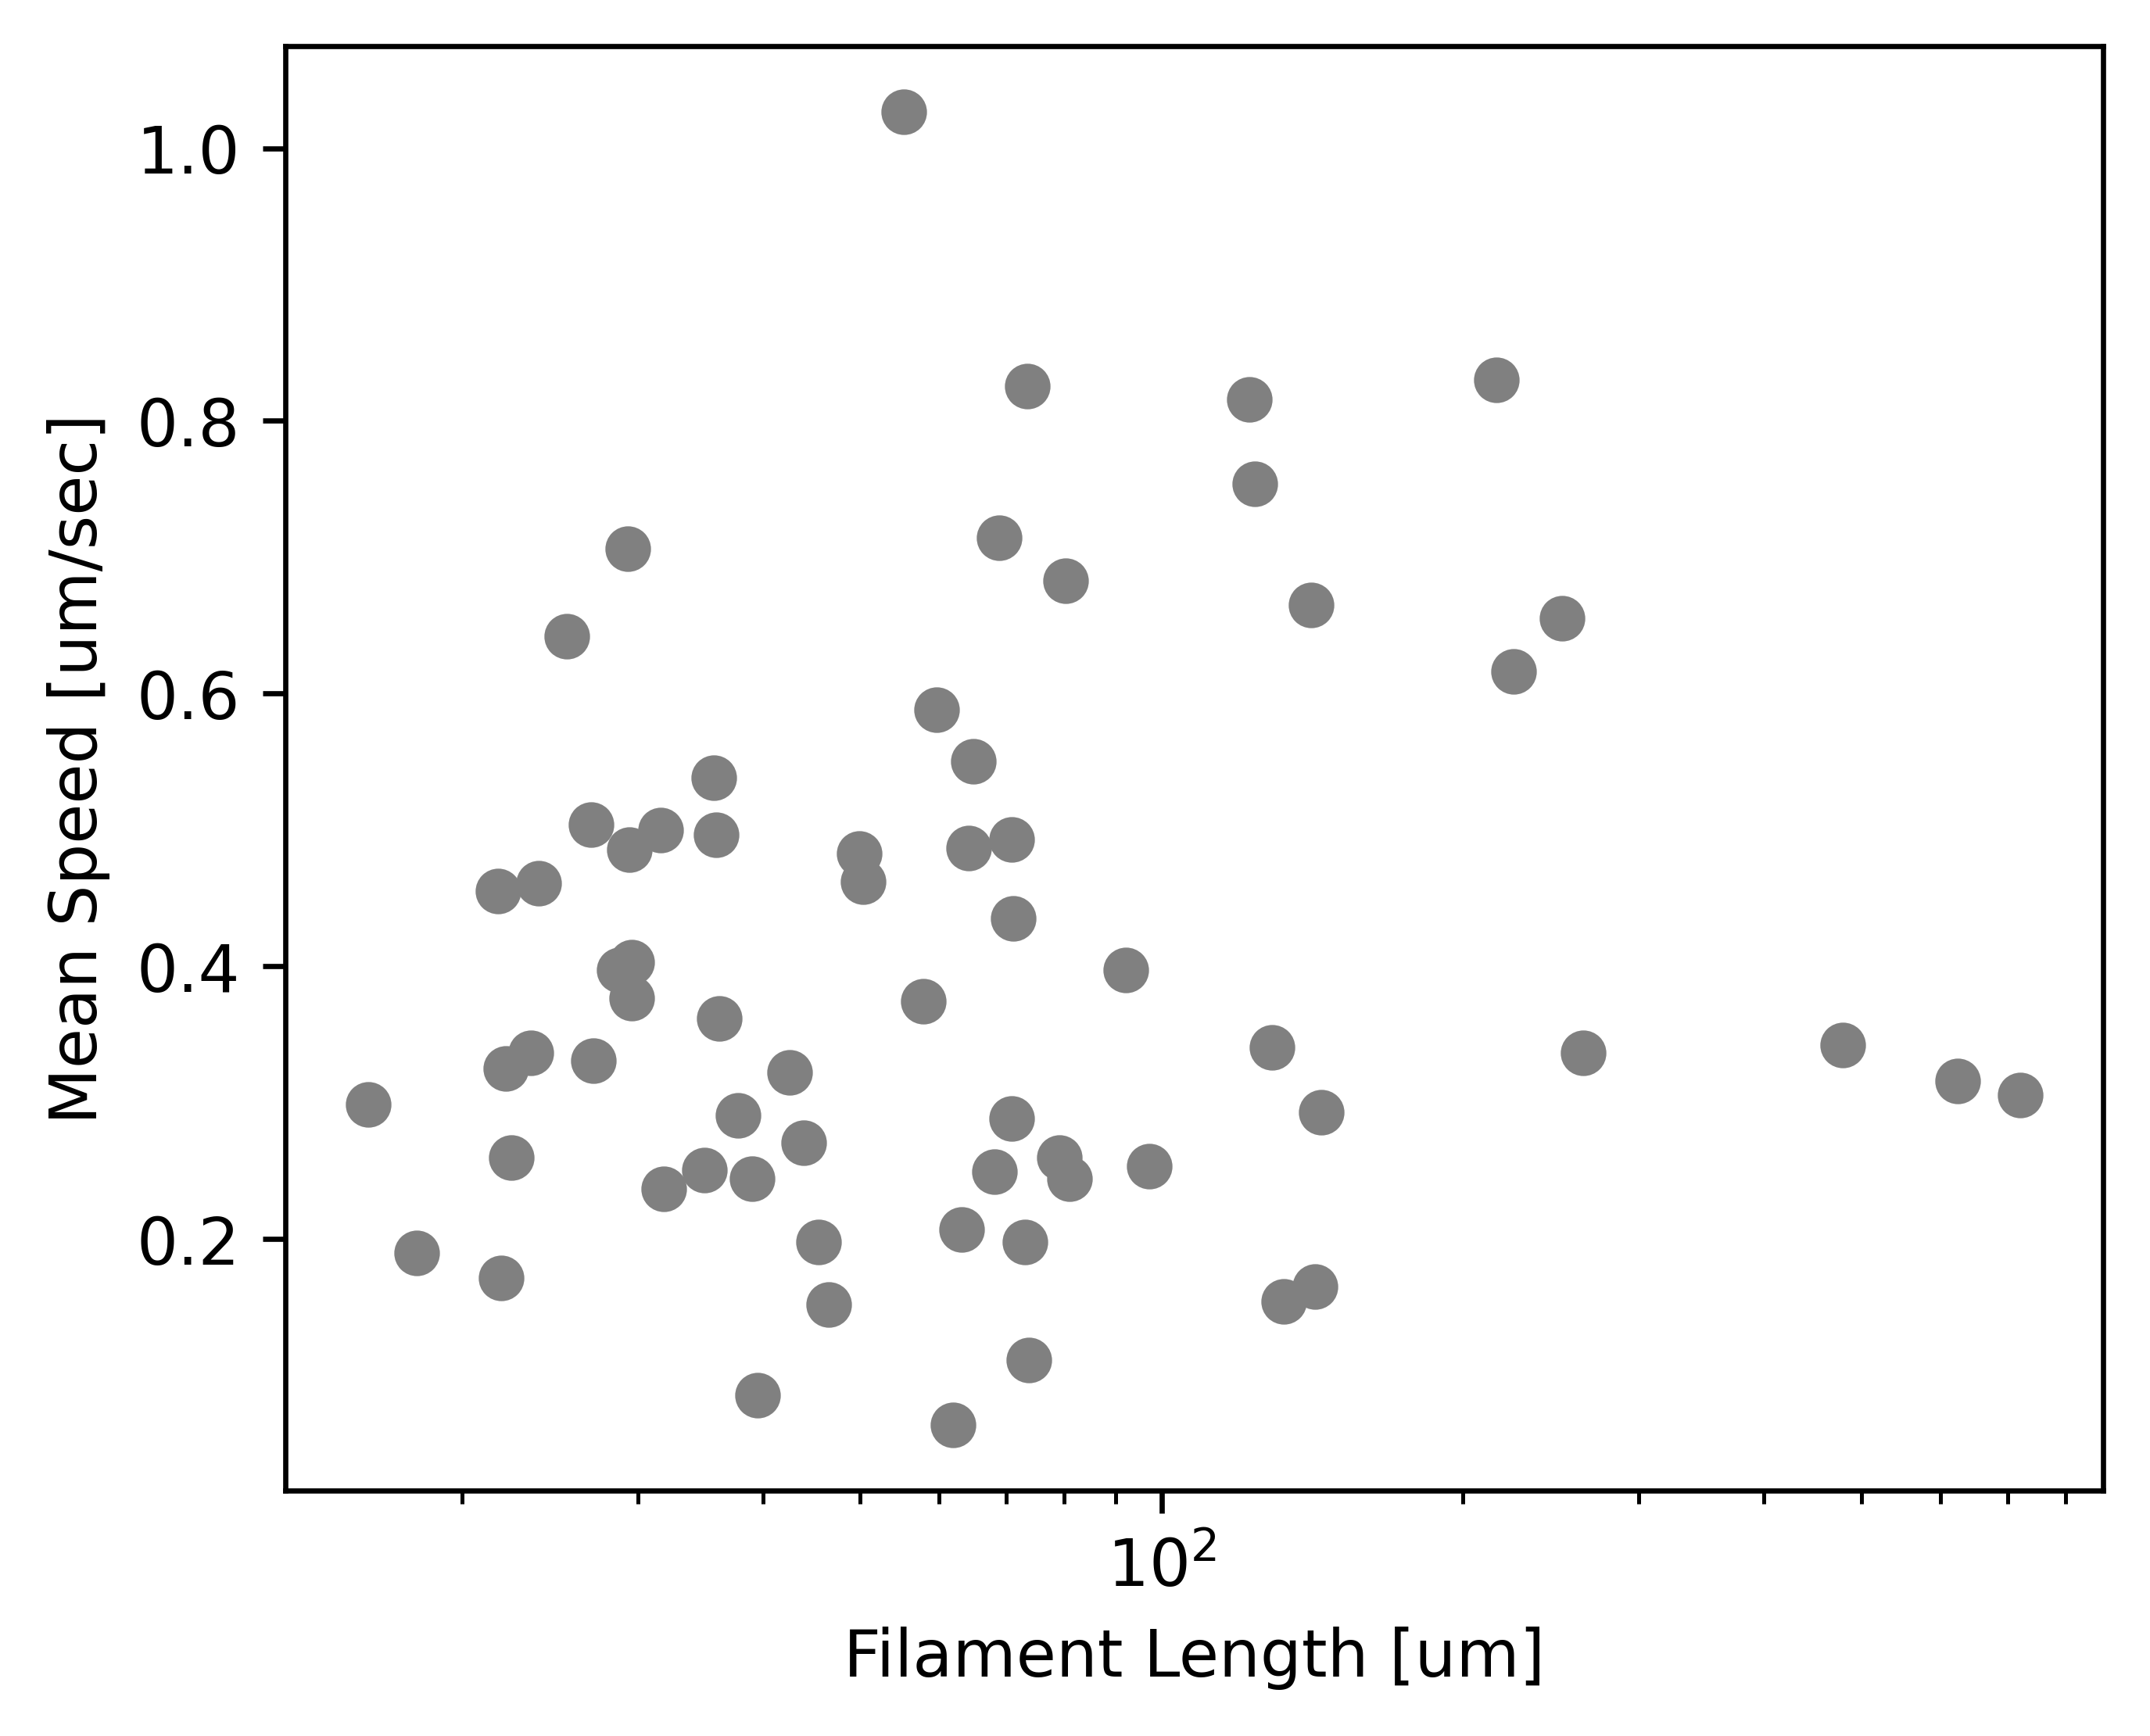

In [178]:
labels=summaryStats[:,1]
mycols=labels/np.max(labels)
fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=600)
#ax.scatter(summaryStats[:,2],summaryStats[:,7],color='gray',alpha=mycols)
ax.scatter(summaryStats[:,2],summaryStats[:,7],color='gray')
ax.set_xscale('log')
ax.set_xlabel('Filament Length [um]')
ax.set_ylabel('Mean Speed [um/sec]')
fig.savefig(saveFileLvsSpeed)
plt.show()
plt.close(fig)

In [179]:
import re 
meanDwellTimes = []
#calculate mean Dwell time
uniqueFiles = np.unique(df1_ids)
for i in range(0,len(uniqueFiles)):
#for i in range(0,5):
    mytimes = []
    fname=uniqueFiles[i]
    firstStep = re.findall(r'[\d]*[\d]s+',fname)[0]
    dt = [float(s) for s in re.findall(r'[\d]*[\d]+',firstStep)][0]
    mydwelltimes = stopDurations[np.where(df1_ids==fname),0]
    meanDwellTimes = np.append(meanDwellTimes,np.nanmean(mydwelltimes))
meanDwellTimes, len(meanDwellTimes), fname, dt,mydwelltimes


(array([ 89.        , 116.        ,  74.        , 133.14285714,
         21.11764706, 108.89655172,  29.10526316, 192.14285714,
         35.59090909, 118.53333333,  75.96428571,  64.04761905,
        447.11111111, 110.        ,  68.5       , 140.74285714,
         27.86666667, 149.28571429,  53.2       ,  35.71428571,
         10.        ,  12.        ,  18.23529412,  31.76470588,
         35.83333333,  81.17647059,  43.        ,  44.        ,
        175.88235294,  88.82352941, 105.        ,  38.54166667,
        112.5       , 315.88235294,  19.09090909, 130.        ,
         73.65384615, 192.5       ,  88.66666667,  71.33333333,
         23.61904762,  33.23076923,  40.53333333,  49.50877193,
         98.66666667,  88.90909091,  23.52777778, 705.2       ,
         80.47619048,  69.14285714,  26.34210526, 310.        ,
        203.625     ,  61.85964912,  58.67346939,  15.80487805,
         22.91044776,  75.78378378,  86.96296296,  39.07317073,
         28.69724771,  28.        ,  39.

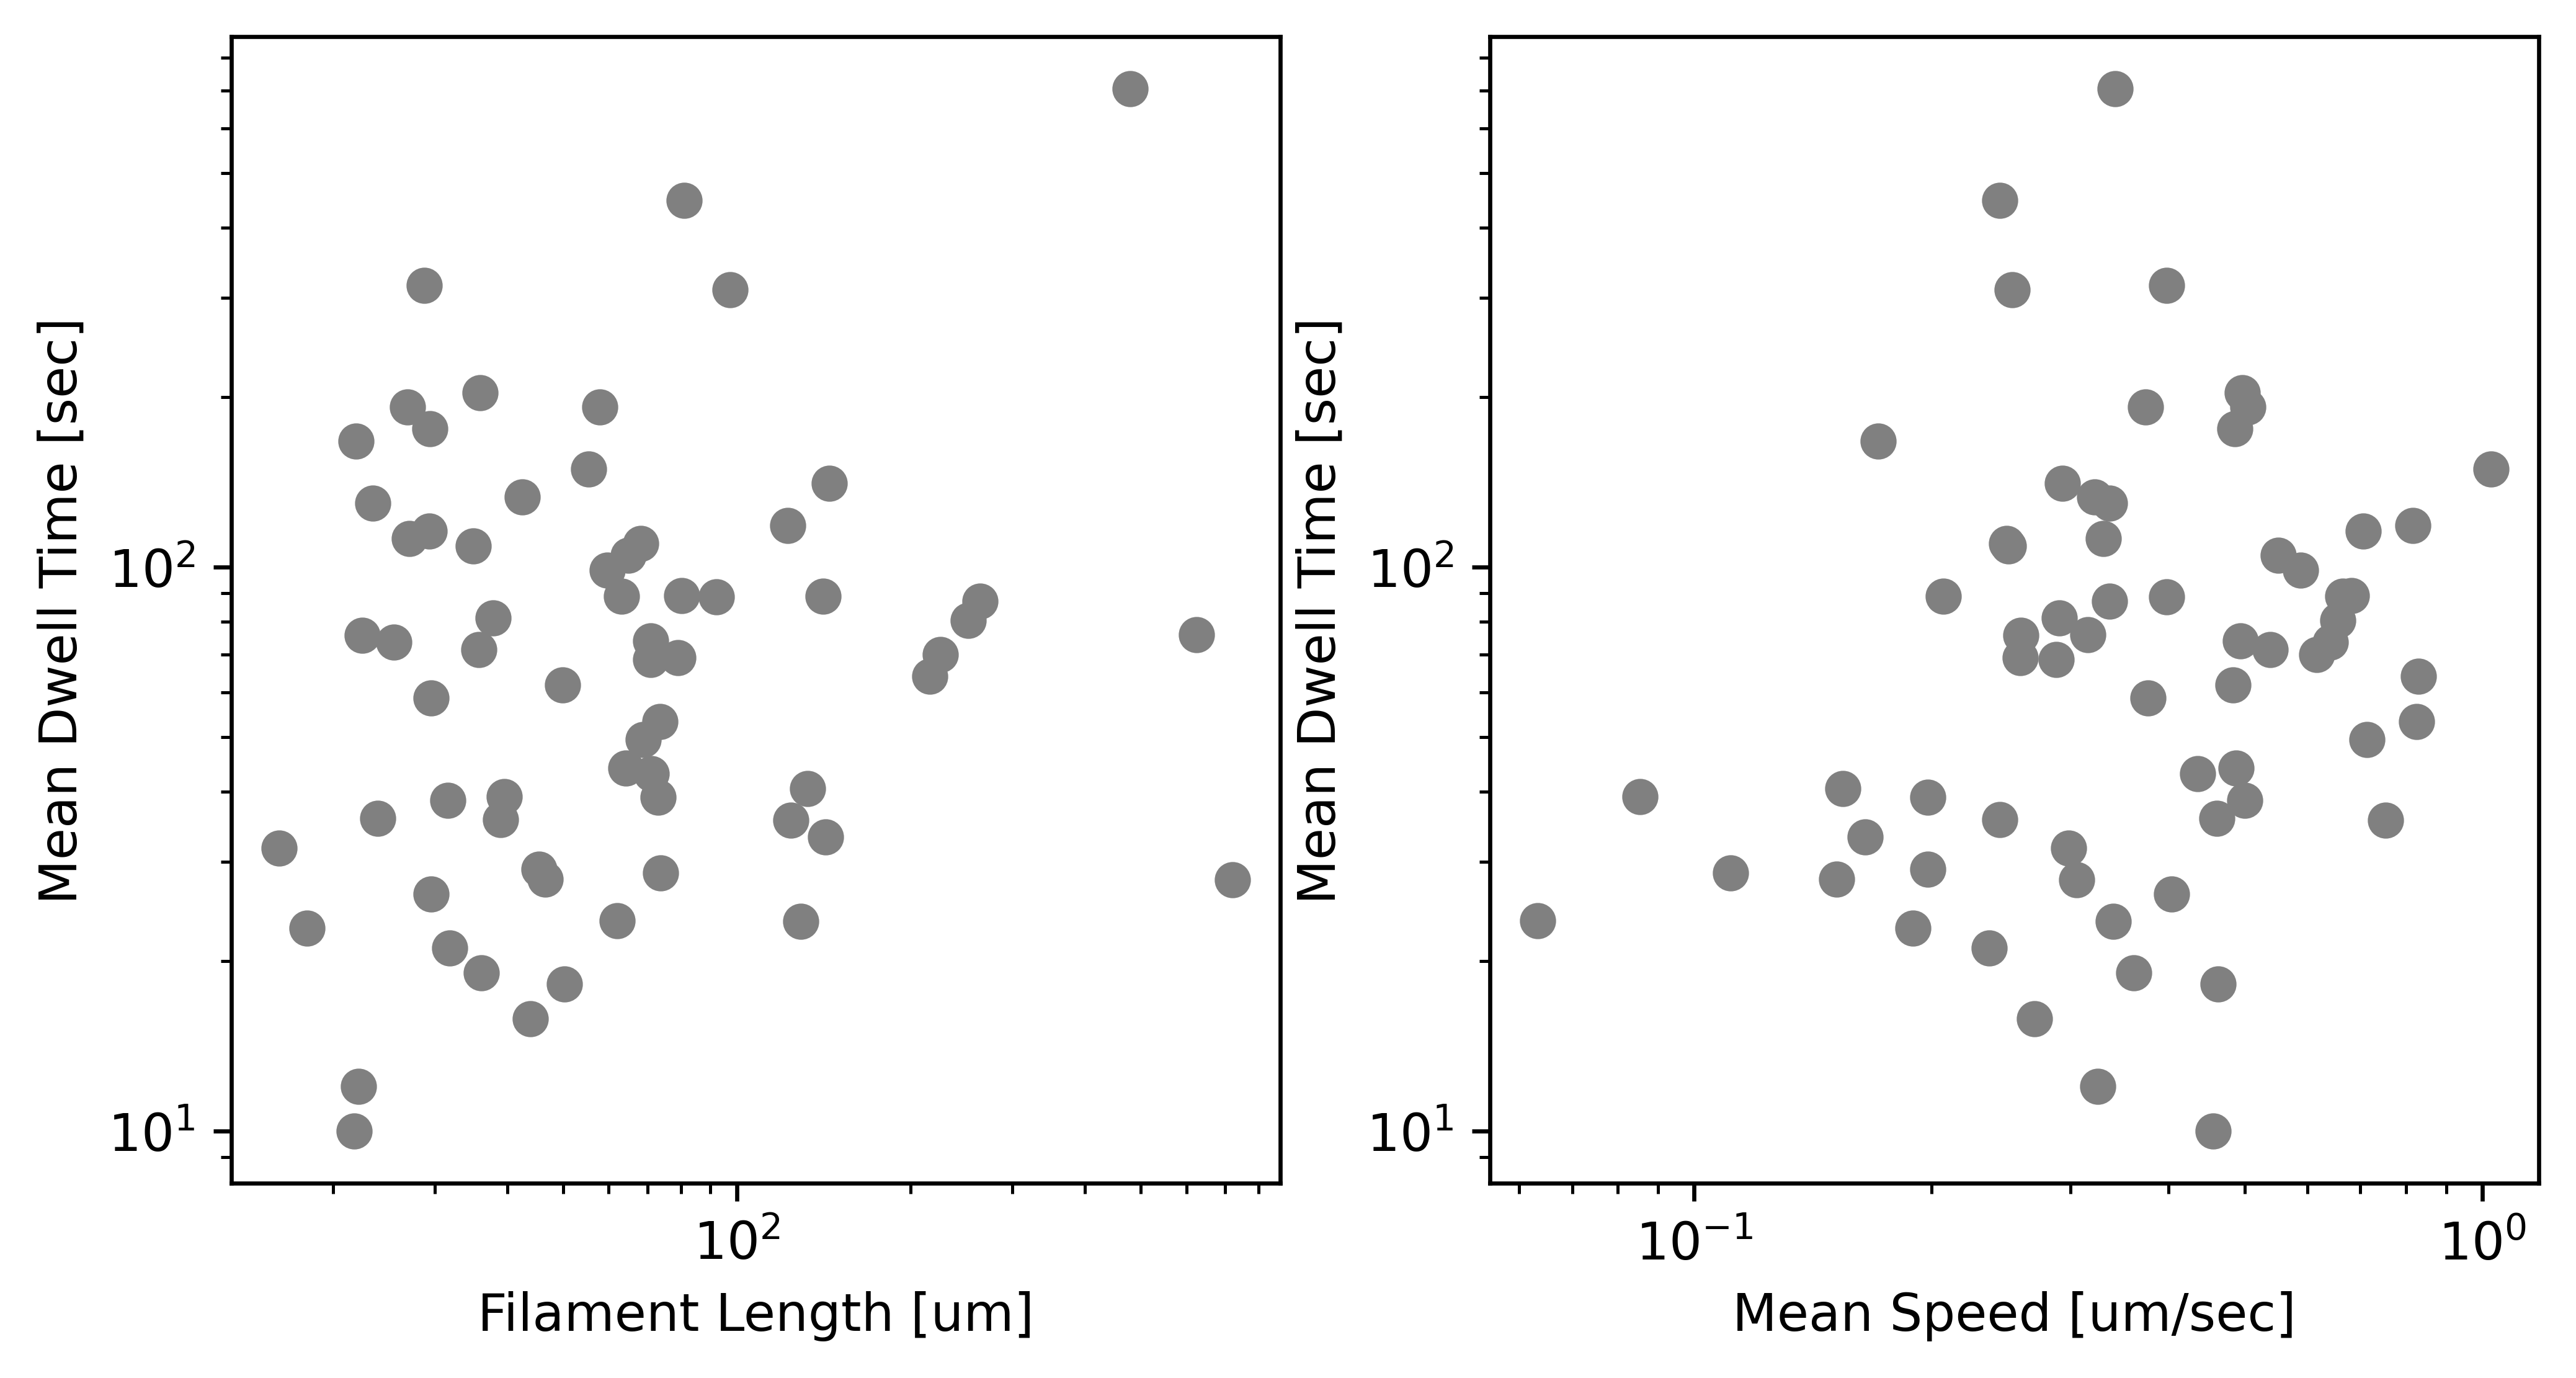

In [180]:

#dwellTimes_woWaitingFils = np.copy(summaryStats[:,9])
dwellTimes_woWaitingFils = np.copy(meanDwellTimes)
#dwellTimes_woWaitingFils[np.where(dwellTimes_woWaitingFils>300)]=np.nan
fig, ax = plt.subplots(1,2, figsize=(8,4), dpi=600)
ax[0].scatter(summaryStats[:,2],dwellTimes_woWaitingFils,color='gray',label='mean')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Filament Length [um]')
#ax[0].set_ylabel('Mean Dwell Time [frames]')
ax[0].set_ylabel('Mean Dwell Time [sec]')
ax[1].scatter(summaryStats[:,7],dwellTimes_woWaitingFils,color='gray',label='mean')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Mean Speed [um/sec]')
#ax[1].set_ylabel('Mean Dwell Time [frames]')
ax[1].set_ylabel('Mean Dwell Time [sec]')
fig.savefig(saveFileLvsDwell)
plt.show()
plt.close(fig)

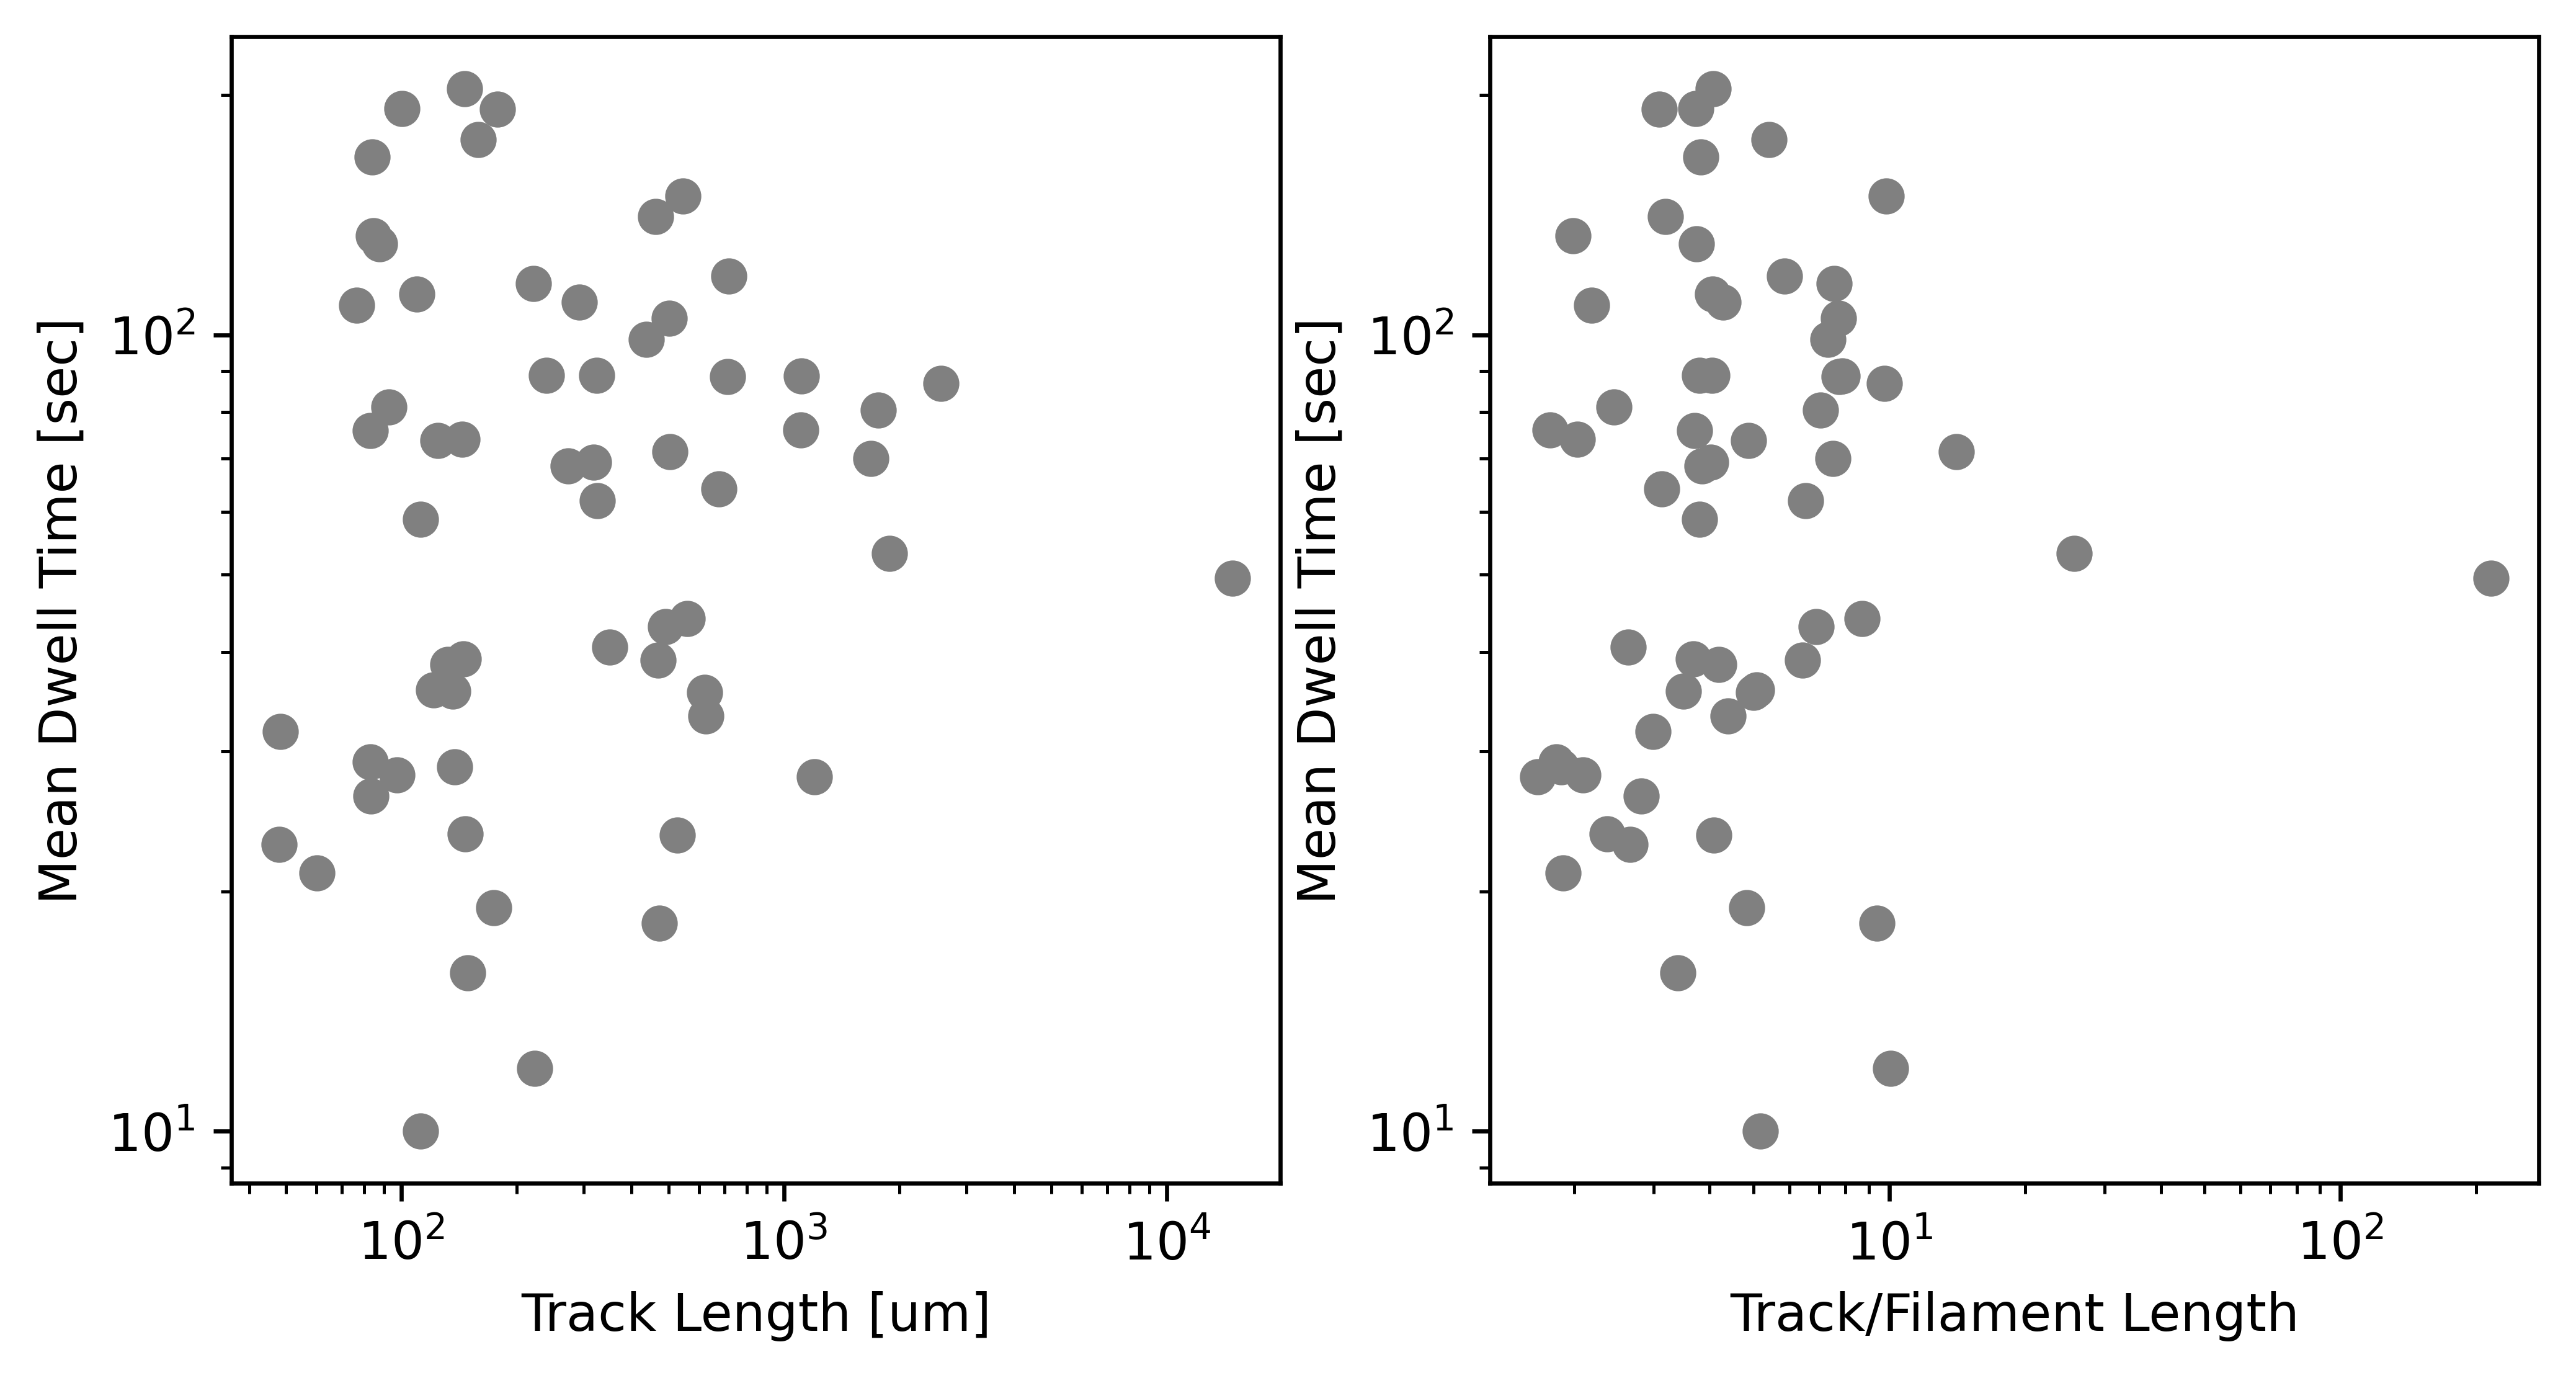

In [181]:
#dwellTimes_woWaitingFils = np.copy(summaryStats[:,9])
dwellTimes_woWaitingFils = np.copy(meanDwellTimes)
dwellTimes_woWaitingFils[np.where(dwellTimes_woWaitingFils>300)]=np.nan
fig, ax = plt.subplots(1,2, figsize=(8,4), dpi=600)
ax[0].scatter(summaryStats[:,3],dwellTimes_woWaitingFils,color='gray',label='mean')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Track Length [um]')
#ax[0].set_ylabel('Mean Dwell Time [frames]')
ax[0].set_ylabel('Mean Dwell Time [sec]')
ax[1].scatter(summaryStats[:,3]/summaryStats[:,2],dwellTimes_woWaitingFils,color='gray',label='mean')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Track/Filament Length')
#ax[1].set_ylabel('Mean Dwell Time [frames]')
ax[1].set_ylabel('Mean Dwell Time [sec]')
#fig.savefig(saveFileLvsDwell)
plt.show()
plt.close(fig)

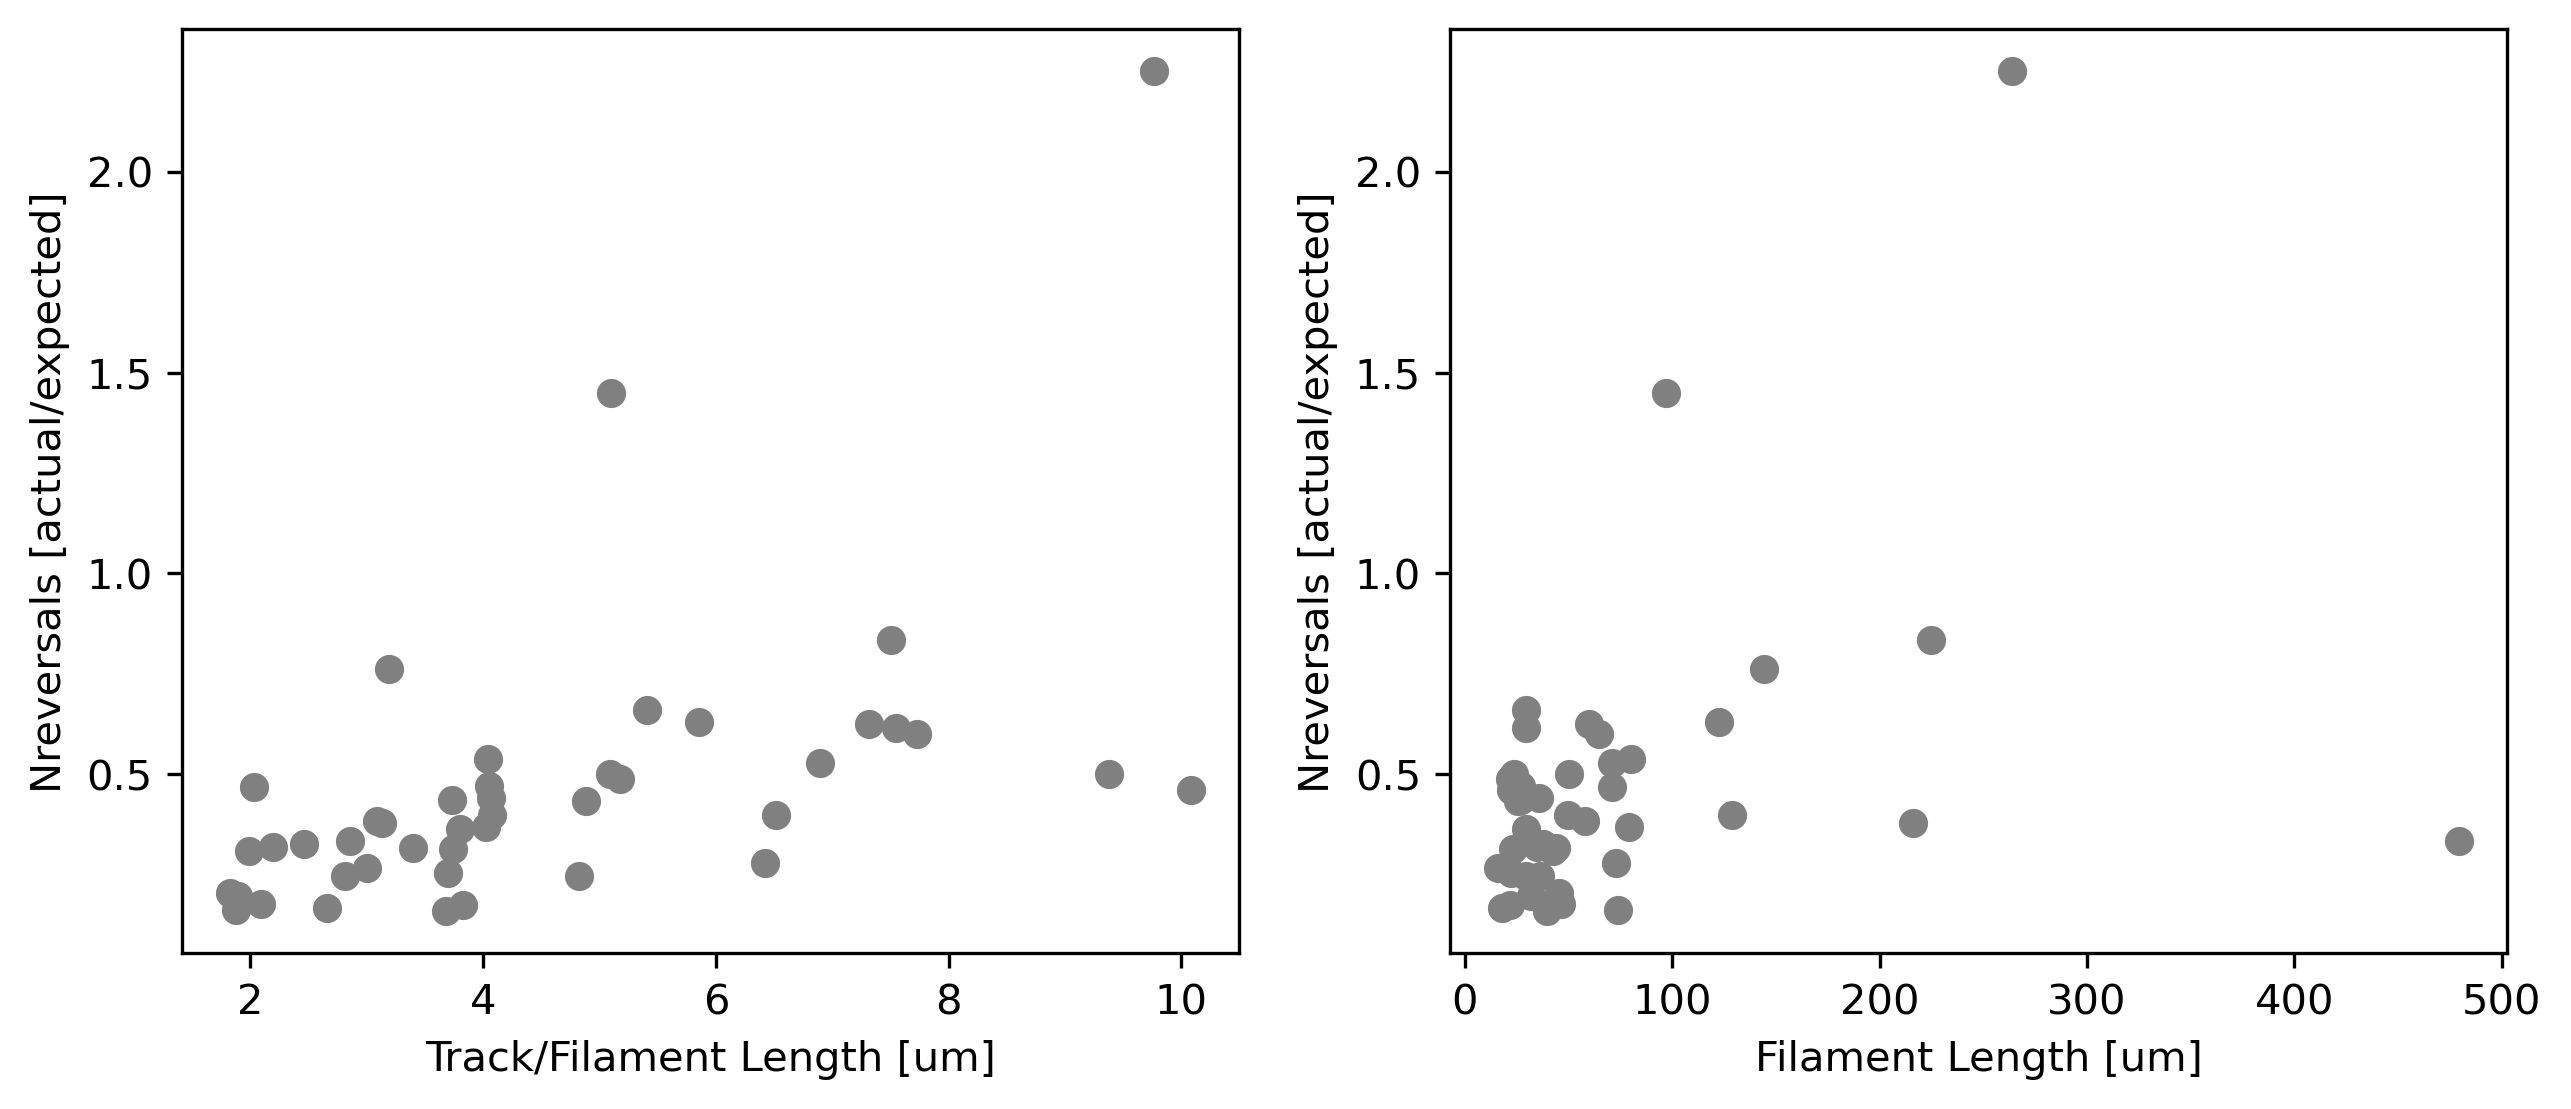

In [182]:
labels=summaryStats[:,1]
mycols=labels/np.max(labels)
mycols[np.where(mycols==0)]=0.2
Nexpected_subset = np.copy(summaryStats[:,4])
Nactual_subset = np.copy(summaryStats[:,5])

Nexpected_subset[np.where(summaryStats[:,16]==0)]=np.nan
Nactual_subset[np.where(summaryStats[:,16]==0)]=np.nan
Nactual_subset[np.where(summaryStats[:,16]==2)]=np.nan
Nexpected_subset[np.where(summaryStats[:,16]==2)]=np.nan

#re-calculate Nexpected
for i in range(0,len(Nexpected_subset)):
    if Nexpected_subset[i] != np.nan:
        D_to_travel = summaryStats[i,3] - summaryStats[i,2]
        speedToUse = np.max([summaryStats[i,6],1.0])
        t_to_travel = D_to_travel / speedToUse
        obsDuration = summaryStats[i,15]
        Nexpected_subset[i] = np.round(obsDuration / t_to_travel)

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=300)
#ax[0].scatter(summaryStats[:,3]/summaryStats[:,2],Nexpected_subset/Nactual_subset,color='gray',alpha=mycols)
ax[0].scatter(summaryStats[:,3]/summaryStats[:,2],Nactual_subset/Nexpected_subset,color='gray')
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax[0].set_xlabel('Track/Filament Length [um]')
ax[0].set_ylabel('Nreversals [actual/expected]')
#ax[1].scatter(summaryStats[:,2],Nexpected_subset/Nactual_subset,color='gray',label='mean',alpha=mycols)
ax[1].scatter(summaryStats[:,2],Nactual_subset/Nexpected_subset,color='gray',label='mean')
#ax[1].set_xscale('log')
#ax[1].set_yscale('log')
ax[1].set_xlabel('Filament Length [um]')
ax[1].set_ylabel('Nreversals [actual/expected]')
#fig.savefig(saveFileLvsNreversal)
plt.show()
plt.close(fig)

In [61]:
np.where(Nexpected_subset/Nactual_subset>1.2), summaryStats[47,0]

((array([47]),),
 '2024-03-15_AgarSandwich_Unperturbed_x4_2s_078_FILAMENT_C_data')

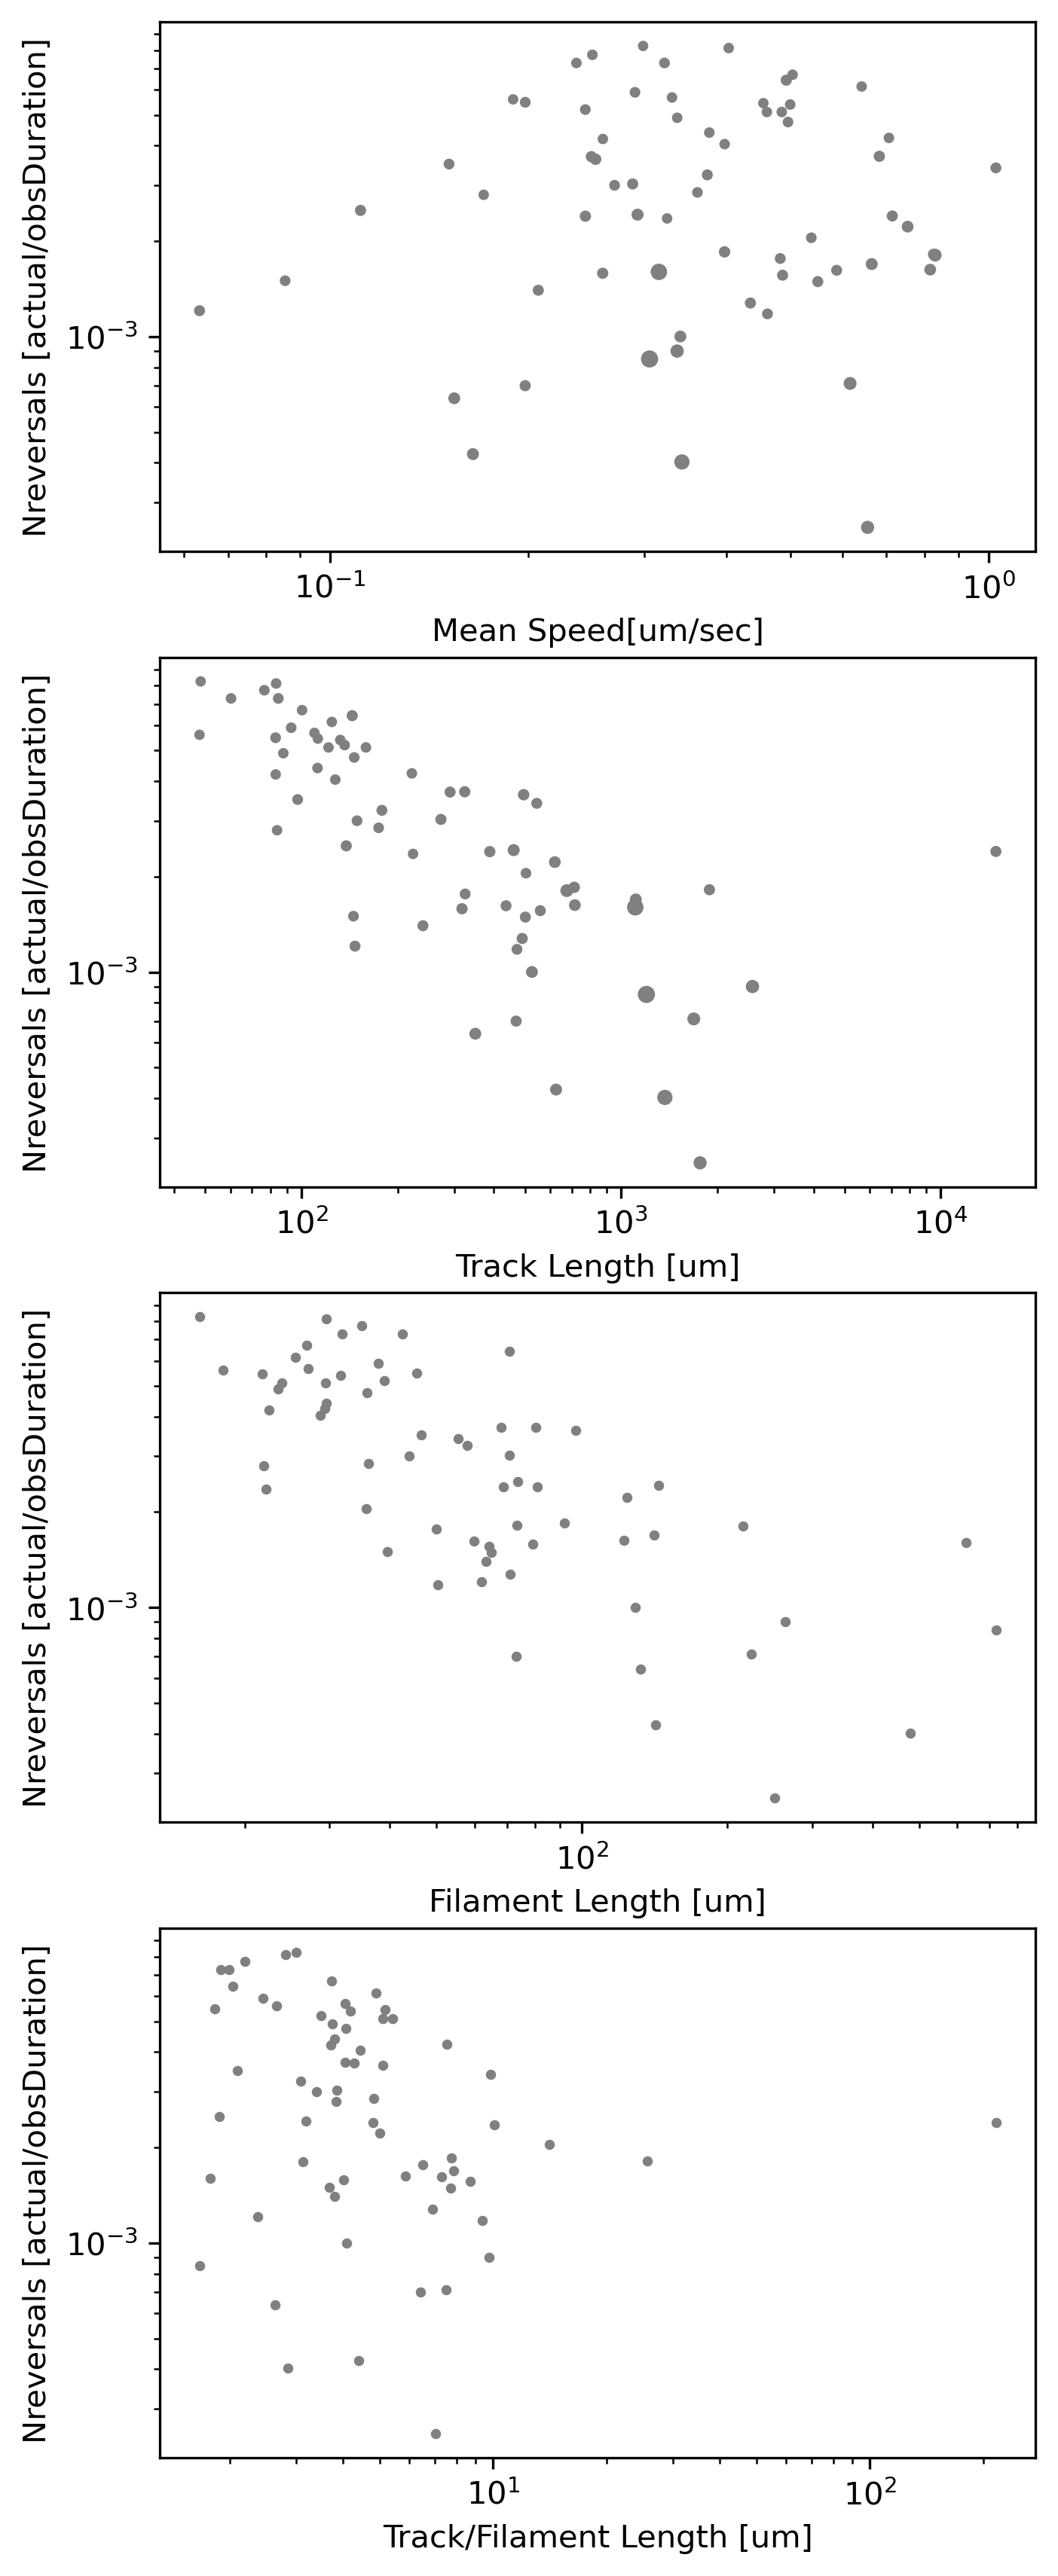

In [187]:
dum=summaryStats[:,2]/np.max(summaryStats[:,2])
#dum=lengths/np.max(lengths)
dum=dum.astype(float)

lengths  = summaryStats[:,2]
mecolors = np.repeat('gray',len(lengths))
for i in range(0,len(lengths)):
    if lengths[i]<50: mecolors[i]='gray'
    if lengths[i]>50 and lengths[i]<75: mecolors[i]='red'
    if lengths[i]>75: mecolors[i]='blue'
fig, ax = plt.subplots(4,1, figsize=(5,14), dpi=300)
#ax[0].scatter(summaryStats[:,2],summaryStats[:,5]/summaryStats[:,15],c=mecolors,label='mean')
ax[0].scatter(summaryStats[:,7],summaryStats[:,5]/summaryStats[:,15],color='gray',s=5+15*dum)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Mean Speed[um/sec]')
ax[0].set_ylabel('Nreversals [actual/obsDuration]')
ax[1].scatter(summaryStats[:,3],summaryStats[:,5]/summaryStats[:,15],color='gray',s=5+15*dum)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Track Length [um]')
ax[1].set_ylabel('Nreversals [actual/obsDuration]')
ax[2].scatter(summaryStats[:,2],summaryStats[:,5]/summaryStats[:,15],color='gray',s=5)
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel('Filament Length [um]')
ax[2].set_ylabel('Nreversals [actual/obsDuration]')
ax[3].scatter(summaryStats[:,3]/summaryStats[:,2],summaryStats[:,5]/summaryStats[:,15],color='gray',s=5)
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].set_xlabel('Track/Filament Length [um]')
ax[3].set_ylabel('Nreversals [actual/obsDuration]')
#fig.savefig(saveFileLvsNreversal)
plt.show()
plt.close(fig)

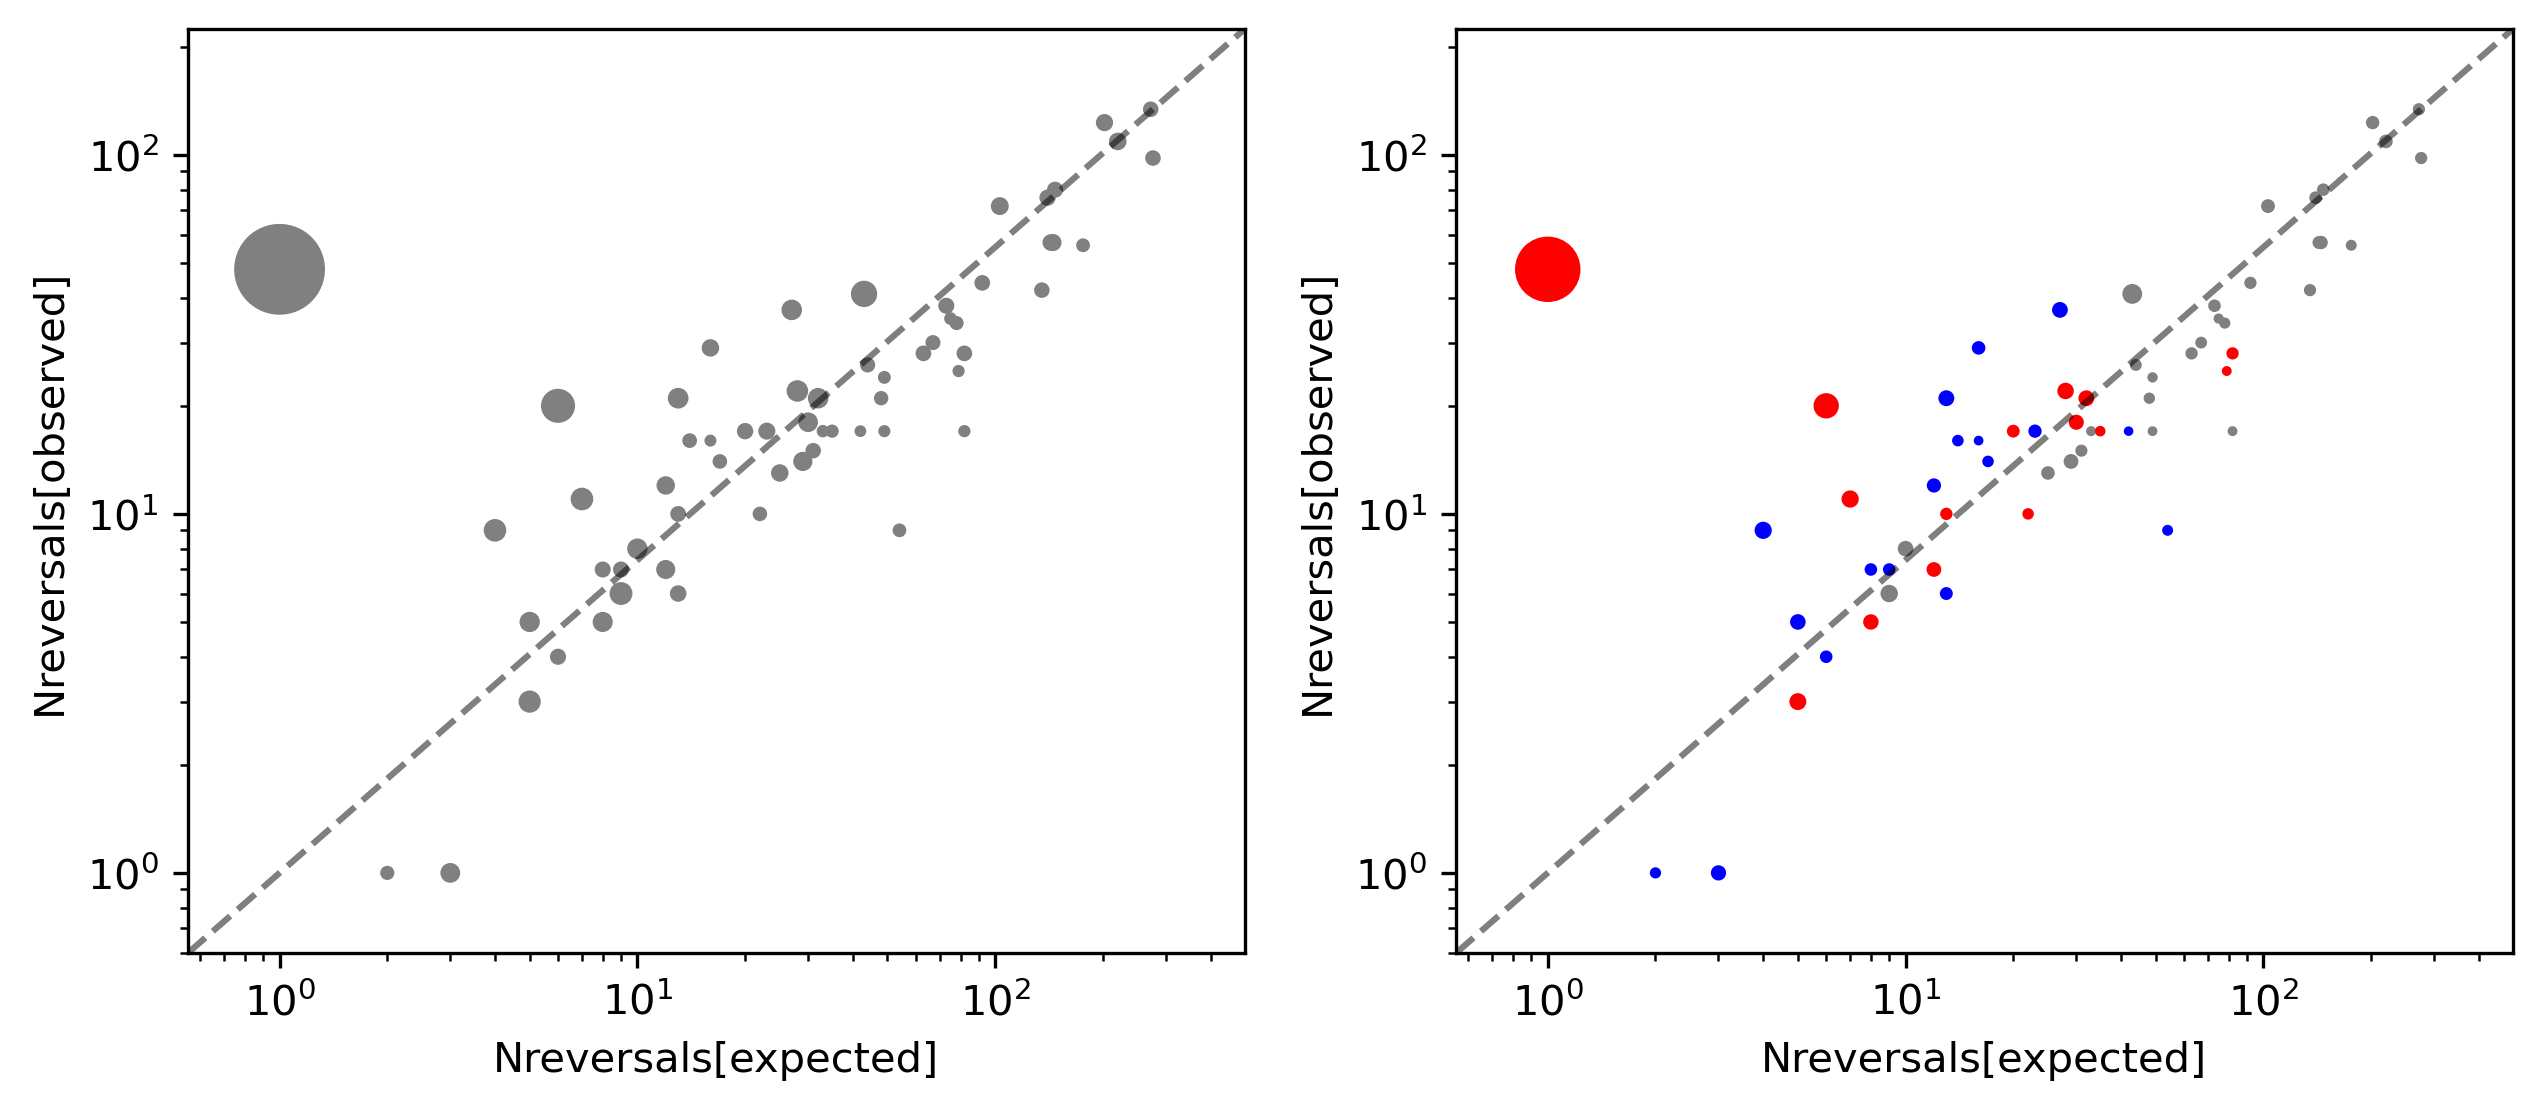

In [200]:
lengths  = summaryStats[:,2]
mecolors = np.repeat('gray',len(lengths))

dum=summaryStats[:,3]/summaryStats[:,2] #track/filament length
#dum=lengths/np.max(lengths)
dum=dum.astype(float)

dum2=summaryStats[:,7]
dum2=dum2/np.max(dum2)
dum2=dum.astype(float)

for i in range(0,len(lengths)):
    if lengths[i]<50: mecolors[i]='gray'
    if lengths[i]>50 and lengths[i]<75: mecolors[i]='red'
    if lengths[i]>75: mecolors[i]='blue'

Nexpected_subset = np.copy(summaryStats[:,4])
Nactual_subset = np.copy(summaryStats[:,5])
#Nexpected_subset[np.where(summaryStats[:,16]==0)]=np.nan
#Nactual_subset[np.where(summaryStats[:,16]==0)]=np.nan
#Nactual_subset[np.where(summaryStats[:,16]==2)]=np.nan
#Nexpected_subset[np.where(summaryStats[:,16]==2)]=np.nan

#re-calculate Nexpected
for i in range(0,len(Nexpected_subset)):
    if Nexpected_subset[i] != np.nan:
        D_to_travel = summaryStats[i,3] - summaryStats[i,2]
        speedToUse = np.min([summaryStats[i,6],1.0])
        t_to_travel = D_to_travel / speedToUse
        obsDuration = summaryStats[i,15]
        Nexpected_subset[i] = np.round(obsDuration / t_to_travel)
        

fig, ax = plt.subplots(1,2, figsize=(10,4), dpi=300)
ax[0].scatter(Nexpected_subset,Nactual_subset,color='gray',s=dum2*2)
#ax[0].scatter(summaryStats[:,4],summaryStats[:,5],label='mean',color='gray')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('Nreversals[expected]')
ax[0].set_ylabel('Nreversals[observed]')
ax[0].axline([ax[0].get_xlim()[0], ax[0].get_ylim()[0]], [ax[0].get_xlim()[1], ax[0].get_ylim()[1]],color='k',alpha=0.5,linestyle="--")
#ax[1].scatter(Nexpected_subset,Nactual_subset,color=mecolors,label='mean')
ax[1].scatter(Nexpected_subset,Nactual_subset,color=mecolors,label='mean',s=dum)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Nreversals[expected]')
ax[1].set_ylabel('Nreversals[observed]')
ax[1].axline([ax[1].get_xlim()[0], ax[1].get_ylim()[0]], [ax[1].get_xlim()[1], ax[1].get_ylim()[1]],color='k',alpha=0.5,linestyle="--")
#fig.savefig(saveFileLvsNreversal)
plt.show()
plt.close(fig)

In [42]:
dum, df.iloc[18, 1]

(array([  4.04288572,   7.55188929,   2.0337938 ,   1.9887121 ,
          1.89191297,   2.18939043,   1.82495096,   3.08576506,
          5.00091961,   5.85249645,   1.77184246,   3.13003234,
          4.79362381,   4.2823336 ,   3.84966397,   3.1921766 ,
          1.66252888,   9.83924622,  25.69854124,   3.49726332,
          5.17330241,  10.08279618,   9.37885189,   2.9978991 ,
          5.08863585,   2.45594909,   6.89328307,   8.69626159,
          5.41022589,   7.87521781,   7.72597381,   4.1818536 ,
          4.05164807,   4.4391309 ,   4.82281704,   3.74064051,
          4.8804032 ,   3.73005878,   7.74106367,  14.09214892,
          2.37203397,   4.39418766,   2.63987247, 216.1454718 ,
          7.31334457,   3.79465174,   4.07930104,   2.85868645,
          7.0318237 ,   4.02043311,   2.81637921,   5.09754129,
          4.07100388,   6.518954  ,   3.79739912,   3.39457319,
          2.65974171,   3.70084972,   9.76314603,   6.41906349,
          1.87328655,   2.09073563,   3.